# **King County Housing Price Analysis**

**Objective:**  
The purpose of this project is to build a robust, interpretable, and data-driven regression model capable of accurately predicting residential property prices using historical sales data and engineered features derived from property characteristics.

**Dataset:**  
The dataset contains 21,613 observations with 21 features describing each property — including structural attributes (sqft_living, bedrooms, bathrooms, grade), location (zipcode, lat, long), and temporal data (yr_built, yr_renovated, date).
The target variable is sale price.  

Here is the link to the dataset: https://www.kaggle.com/datasets/minasameh55/king-country-houses-aa?resource=download 

**Methodology Overview:**  
&nbsp;&nbsp;&nbsp;&nbsp;1. Importing libraries and loading the data     
&nbsp;&nbsp;&nbsp;&nbsp;2. Exploratory data analysis (EDA) to verify data quality and learn the features  
&nbsp;&nbsp;&nbsp;&nbsp;3. Data cleaning and transformation  
&nbsp;&nbsp;&nbsp;&nbsp;4. Feature engineering  
&nbsp;&nbsp;&nbsp;&nbsp;5. Model development  
&nbsp;&nbsp;&nbsp;&nbsp;6. Summary of ML models  
&nbsp;&nbsp;&nbsp;&nbsp;7. Final model evaluation    
&nbsp;&nbsp;&nbsp;&nbsp;8. Conclusions and next steps  

**Goal of this notebook:**
- Understand which factors drive house prices in King County (2014–2015).
- Build and compare several regression models.
- Select a final model that balances accuracy and generalization.
- Save the best model for later use.

## **Step1:** Import libraries and Load the dataset

In [64]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
# Importing libraries for loading the dataset and data analysis:
# Libraries for handling operations on datasets and data series
import numpy as np
import pandas as pd
# Library for statistical functions
import scipy.stats as st
# Libraries for visualization of the data
import matplotlib.pyplot as plt
import seaborn as sns
# Library that includes our dataset
import kagglehub
# Import operating system functions for handling file paths, directories, etc.
import os

In [128]:
# Download the dataset from Kaggle, find the CSV file in the download folder, and load it into a pandas DataFrame for analysis.
# Printing the absolute location (path), where the file is stored
path = kagglehub.dataset_download("minasameh55/king-country-houses-aa")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\julia\.cache\kagglehub\datasets\minasameh55\king-country-houses-aa\versions\1


In [129]:
# Lists all files in the downloaded folder
files = os.listdir(path)
# Finds the CSV file in the folder
csv_file = [f for f in files if f.endswith('.csv')][0]
# Creates the complete path to the CSV file
data_path = os.path.join(path, csv_file)
# Load the dataframe
houses = pd.read_csv(data_path)

## **Step2 and 3:** Explore the dataset: EDA & Data Cleaning and Transformation

In [130]:
print("===Dataset Shape (rows, columns)===")
houses.shape

===Dataset Shape (rows, columns)===


(21613, 21)

In [131]:
print('='*10, 'Dataset Characteristics', '='*10, "\n")
houses.info()

========== Dataset Characteristics ========== 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  la

In [132]:
print('='*10, 'Null values per column', '='*10, "\n")
houses.isna().sum()

========== Null values per column ========== 



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [133]:
print('='*10, 'Duplicated Rows', '='*10, "\n")
houses.duplicated().sum()       # Count duplicate rows

========== Duplicated Rows ========== 



np.int64(0)

In [134]:
# Display the number of unique values per column
# .nunique() counts how many distinct entries exist in each column
print("=== Unique Values Per Column ===")
print(houses.nunique())

=== Unique Values Per Column ===
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [135]:
houses.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [136]:
houses.sample(5)

id             date     price  bedrooms  bathrooms  \
17985  2141500040  20140912T000000  440000.0         4       2.50   
12955  2019200220  20140923T000000  160000.0         3       2.25   
14553  2591780180  20140813T000000  365000.0         5       2.75   
20948  7853350220  20150324T000000  605000.0         3       2.75   
4081   3321069006  20141231T000000  905000.0         3       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
17985         2400      8038     2.0           0     0  ...      8   
12955         1470      8682     1.0           0     0  ...      7   
14553         3260      9253     2.0           0     0  ...      8   
20948         2450      5750     2.0           0     0  ...      9   
4081          3520    237402     2.5           0     0  ...      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17985        2400              0      2002             0    98059  47.4881   
12955        1160            310      1985             0    98003  47.2729   
14553        3260              0      2004             0    98042  47.3674   
20948        2450              0      2013             0    98065  47.5439   
4081         3520              0      2004             0    98092  47.2687   

          long  sqft_living15  sqft_lot15  
17985 -122.143           2040        7756  
12955 -122.299           1670        8359  
14553 -122.070           2770        8067  
20948 -121.862           3200        8036  
4081  -122.056           2310      165963  

[5 rows x 21 columns]

In [137]:
# Examining the date column (object). The column contains a letter 'T' after a date (probably, time) followed by 0s. Evaluating whether there are only 0s after T.

# Extract the time part as a string (last 6 characters after 'T')
houses['time_part'] = houses['date'].astype(str).str[-6:]

# Check unique values in the time part
print(houses['time_part'].unique())


['000000']


In [138]:
# Deleting the newly created column 'time_part', since it doesn't bring any new information
houses = houses.drop(columns=['time_part'])

In [139]:
print('='*70, 'Statistical Summary of the dataset features', '='*70, "\n")
houses.describe()

====================================================================== Statistical Summary of the dataset features ====================================================================== 



id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

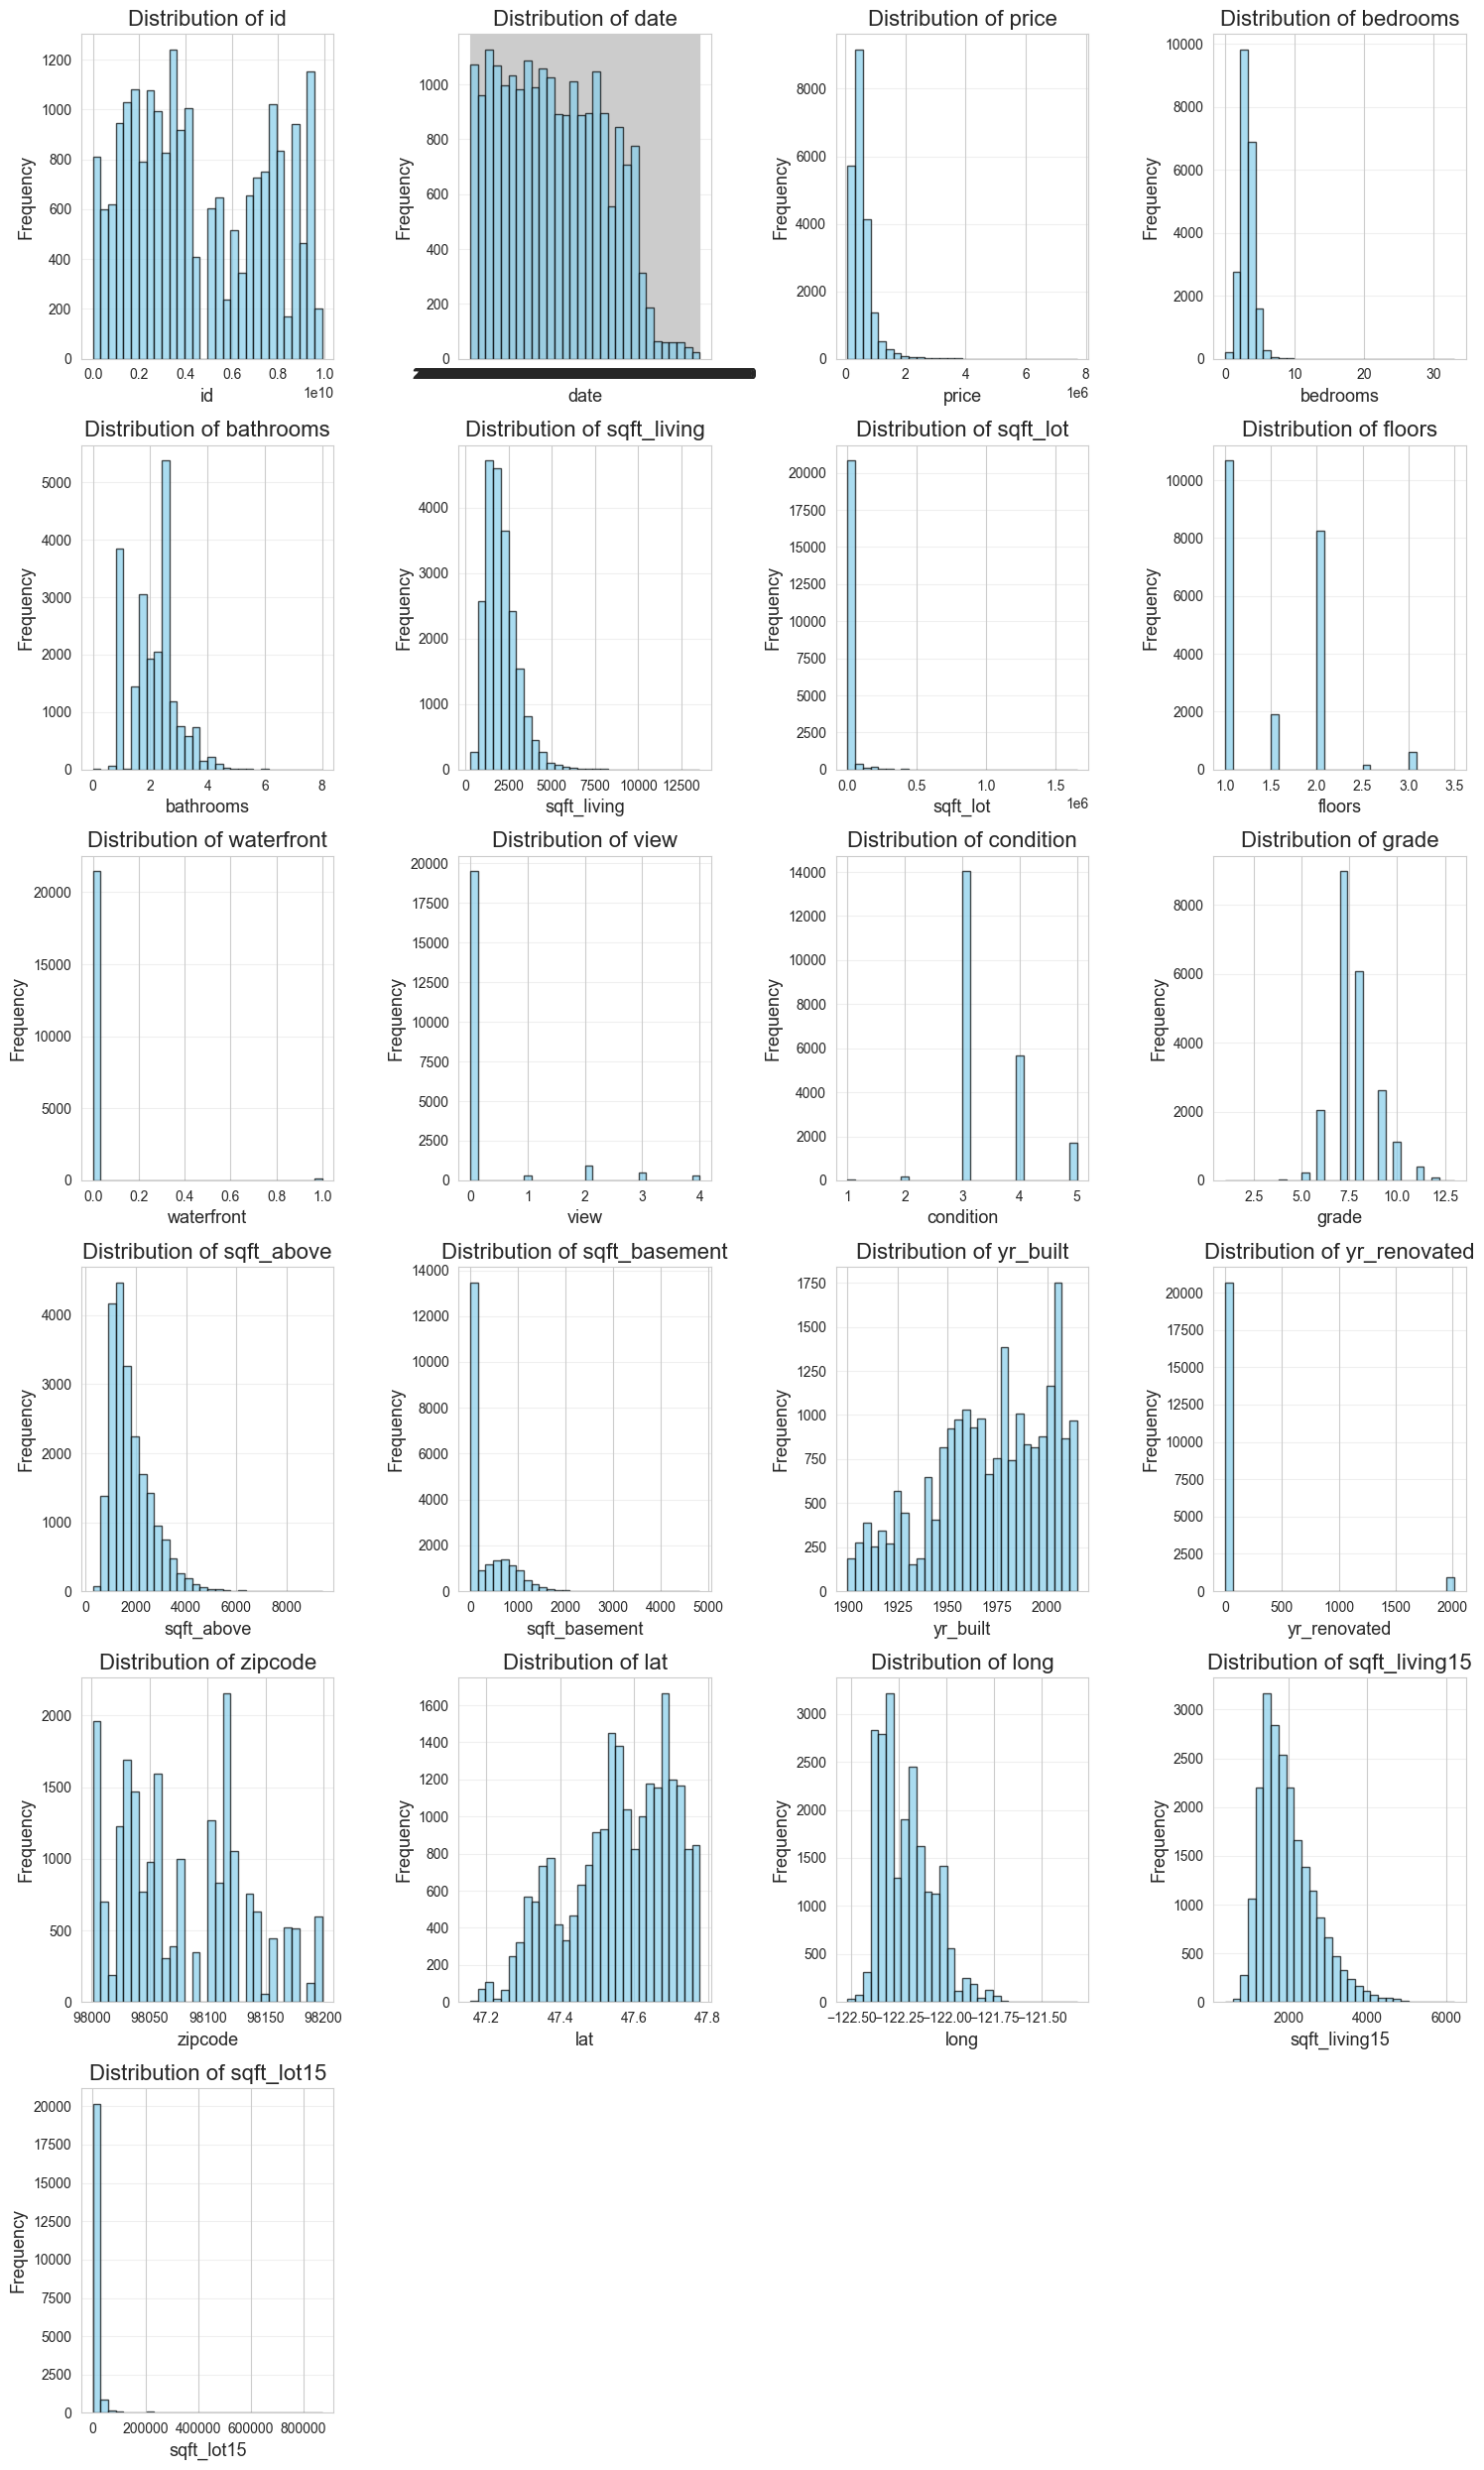

In [142]:
# Visualizing and examining the data
fig, axes = plt.subplots(6, 4, figsize=(15, 25))     # (plots on y, plots on x )
axes = axes.ravel()

for idx, col in enumerate(houses):  
    axes[idx].hist(houses[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Turn off any unused subplots (e.g., 24 slots, 21 features)
for j in range(len(houses.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [143]:
# Extract year and month from the sale date for modeling, then remove the original date column to simplify features.
houses['date'] = pd.to_datetime(houses['date'])
houses['year_sold'] = houses['date'].dt.year
houses['month_sold'] = houses['date'].dt.month
houses['day_of_week'] = houses['date'].dt.dayofweek  # Numeric: 0=Monday, ..., 6=Sunday
# delete
houses = houses.drop(columns=['date'])

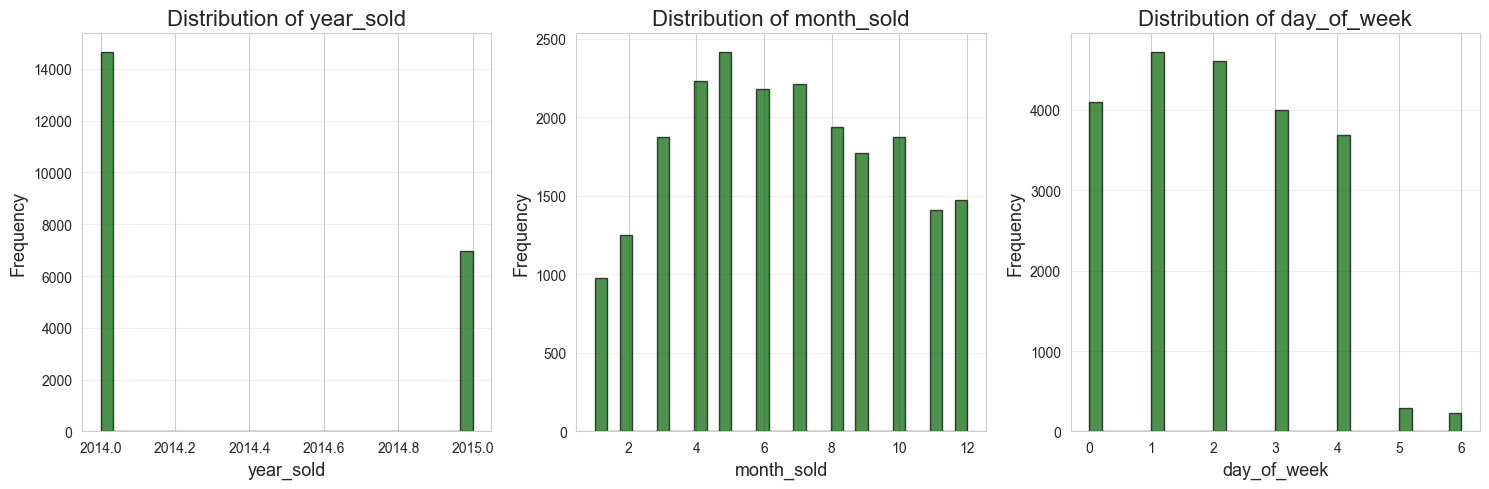

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()
date_houses=houses[['year_sold','month_sold', 'day_of_week']]

for idx, col in enumerate(date_houses):  
    axes[idx].hist(date_houses[col], bins=30, edgecolor='black', alpha=0.7, color='darkgreen')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [145]:
houses.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold',
       'day_of_week'],
      dtype='object')

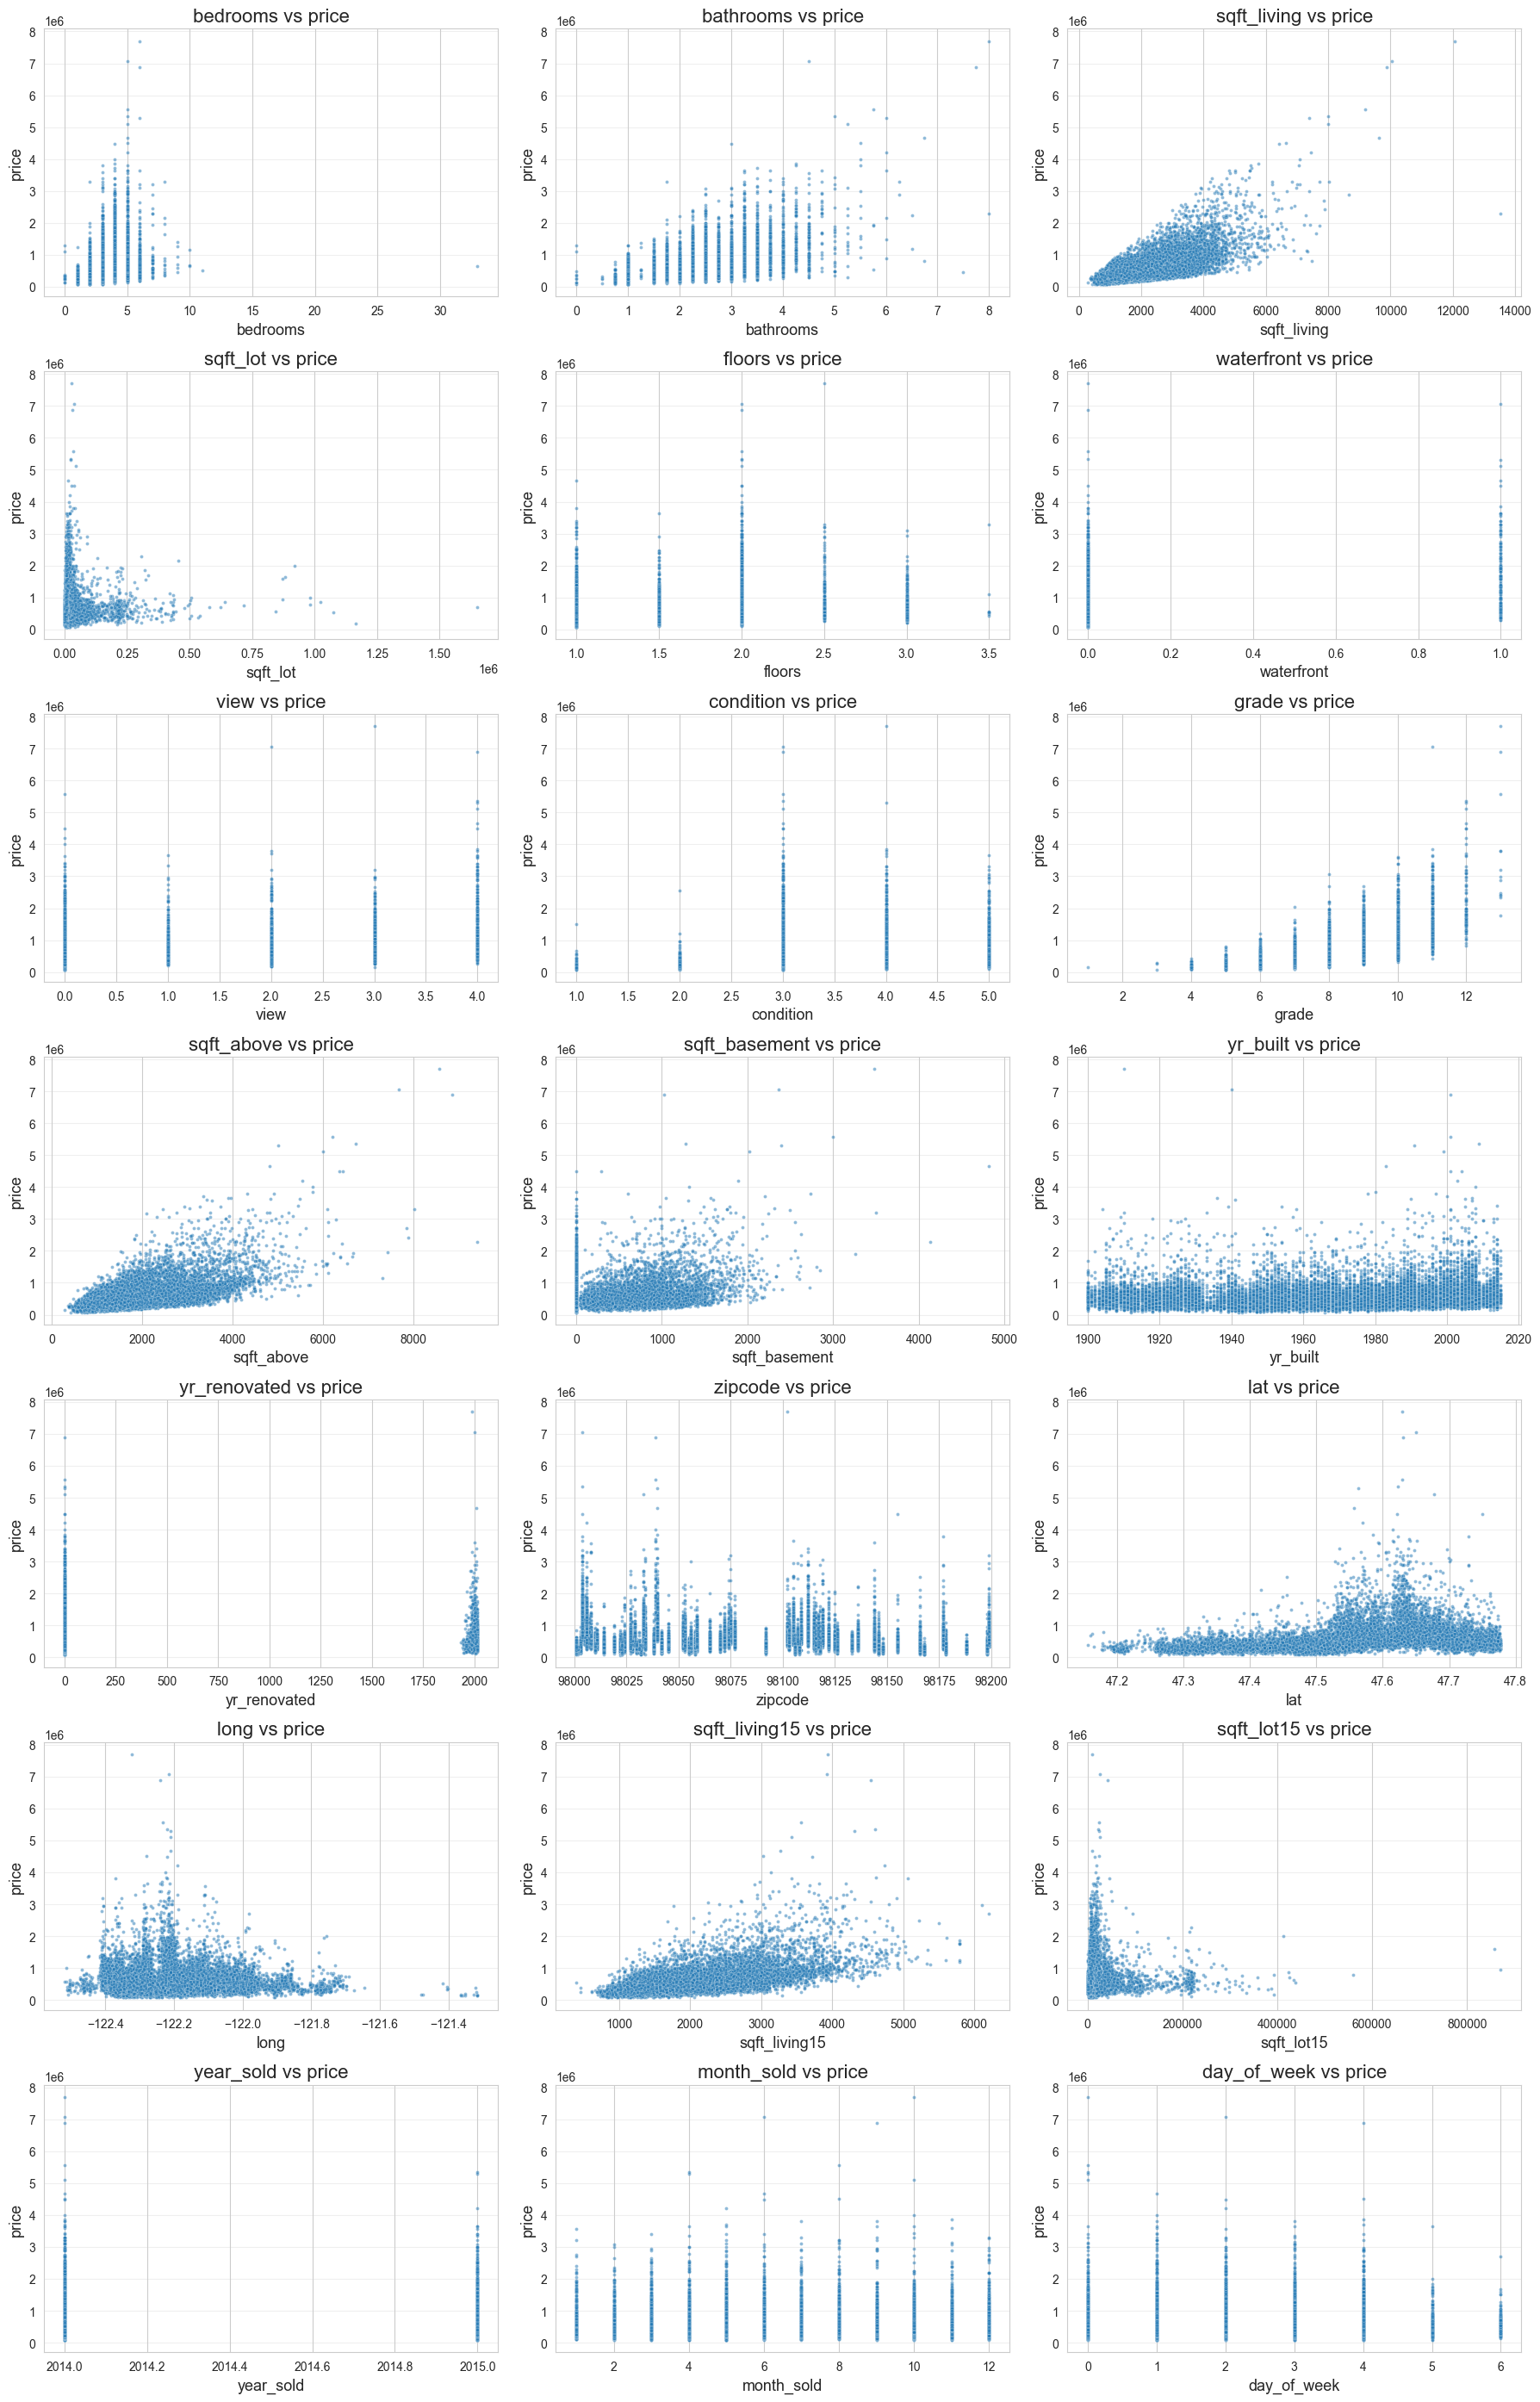

In [146]:
# Evaluation of the correlation of the target variable (price) and all the features
fig, axes = plt.subplots(7, 3, figsize=(18, 28))
axes = axes.ravel()

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'month_sold', 'day_of_week']


for idx, col in enumerate(features):
    ax = axes[idx]
    sns.scatterplot(
        data=houses,
        x=col,
        y='price',
        ax=ax,
        s=8,           # smaller points for readability
        alpha=0.5
    )
    ax.set_title(f'{col} vs price')
    ax.set_xlabel(col)
    ax.set_ylabel('price')
    axes[idx].grid(axis='y', alpha=0.3)

# Turn off any unused subplots (e.g., 24 slots, 21 features)
for j in range(len(features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

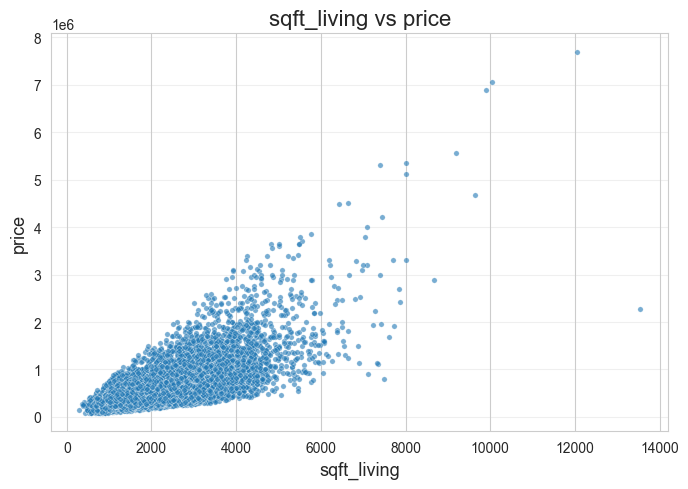

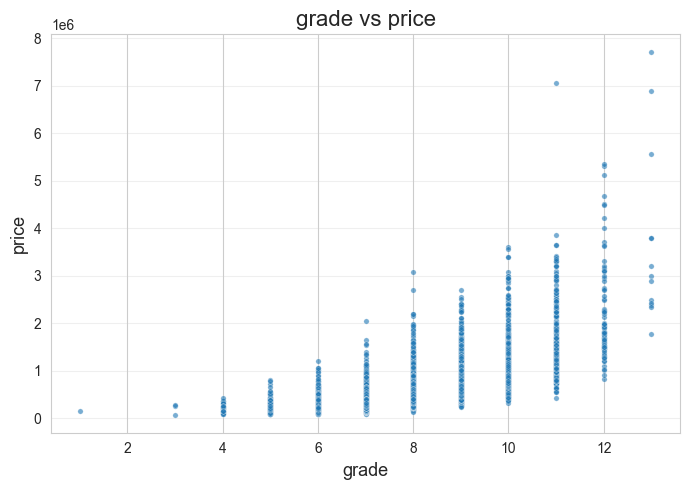

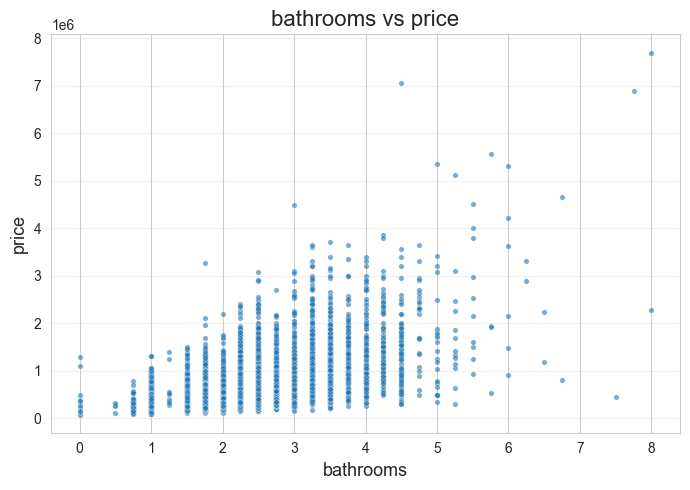

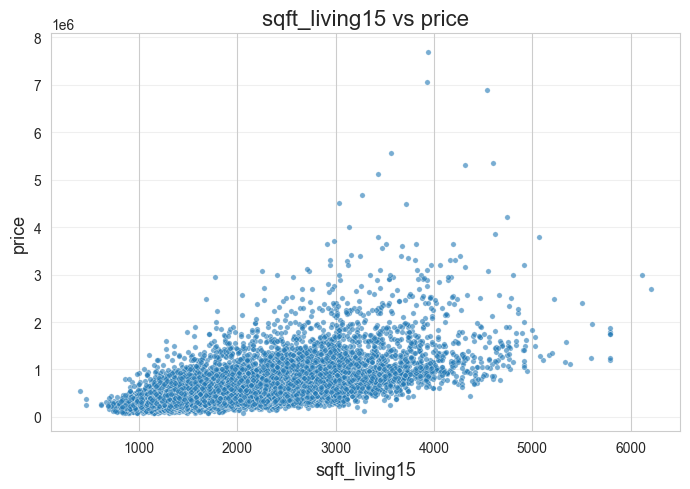

In [147]:
# Zooming in in a few features

key_features = ['sqft_living', 'grade', 'bathrooms', 'sqft_living15']
for col in key_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=houses,
        x=col,
        y='price',
        s=15,
        alpha=0.6
    )
    plt.title(f'{col} vs price')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


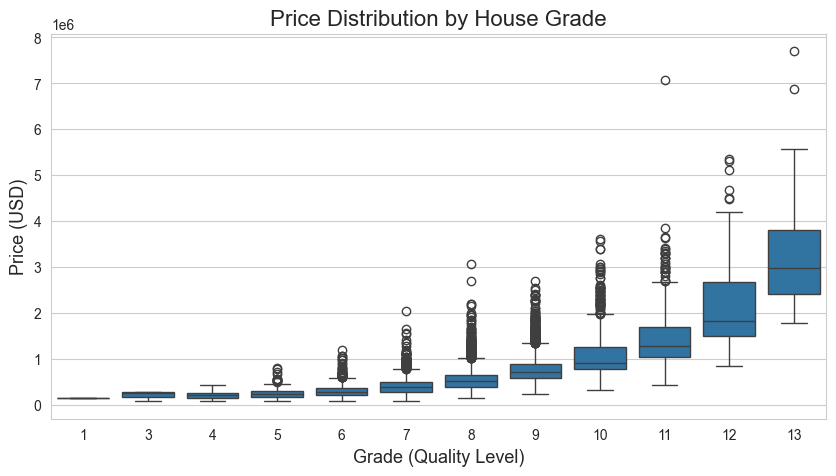

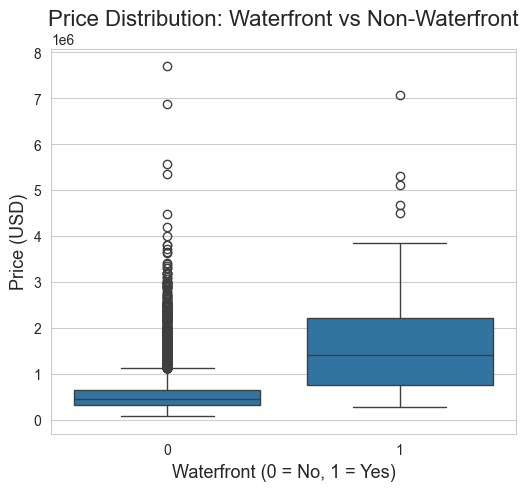

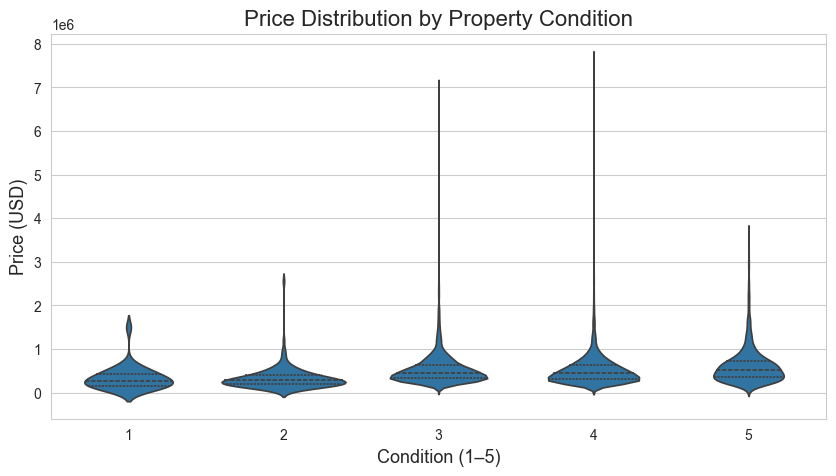

In [153]:
# Box plot — Price distribution by Grade
plt.figure(figsize=(10, 5))
sns.boxplot(data=houses, x='grade', y='price')
plt.title("Price Distribution by House Grade")
plt.xlabel("Grade (Quality Level)")
plt.ylabel("Price (USD)")
plt.show()

# Box plot — Waterfront vs Price
# 'waterfront' is binary: 0 = no, 1 = yes.
plt.figure(figsize=(6, 5))
sns.boxplot(data=houses, x='waterfront', y='price')
plt.title("Price Distribution: Waterfront vs Non-Waterfront")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price (USD)")
plt.show()

# Step 6.5: Violin plot — Price by Condition
plt.figure(figsize=(10, 5))
sns.violinplot(data=houses, x='condition', y='price', inner='quartile')
plt.title("Price Distribution by Property Condition")
plt.xlabel("Condition (1–5)")
plt.ylabel("Price (USD)")
plt.show()

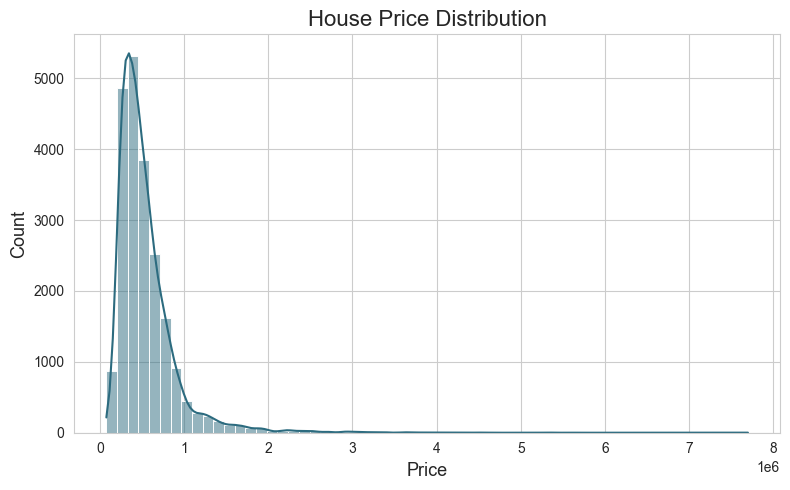

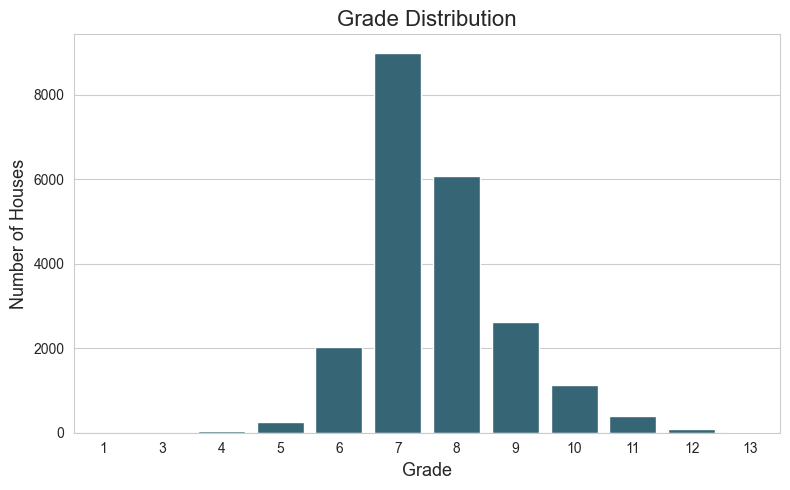

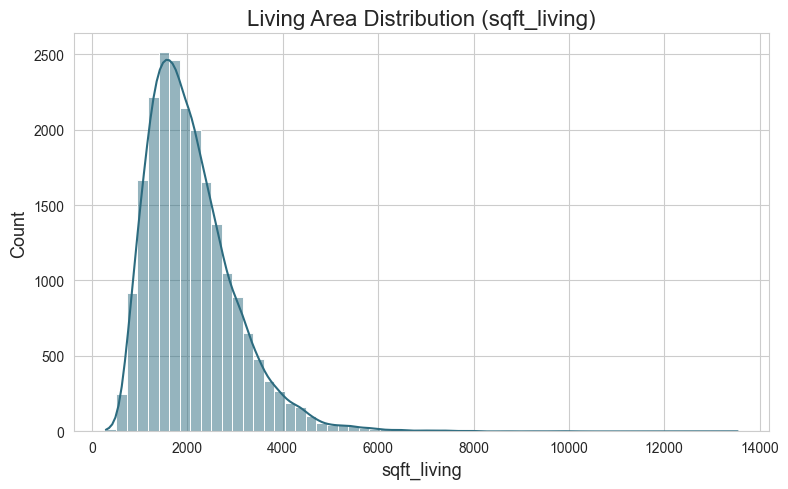

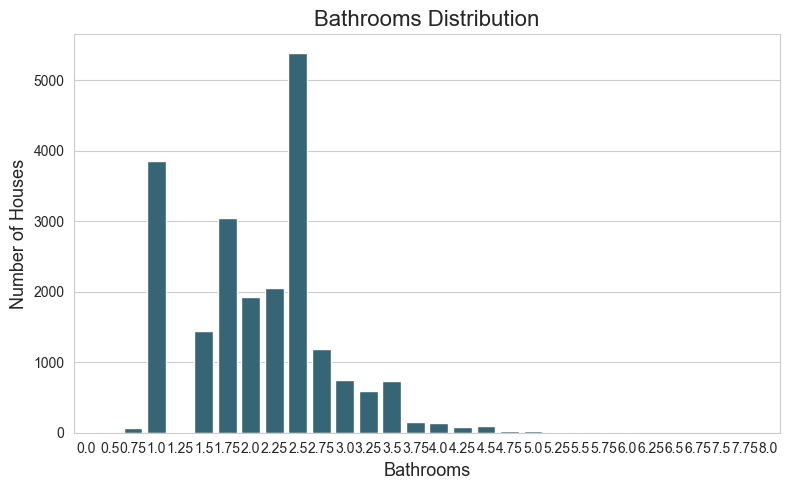

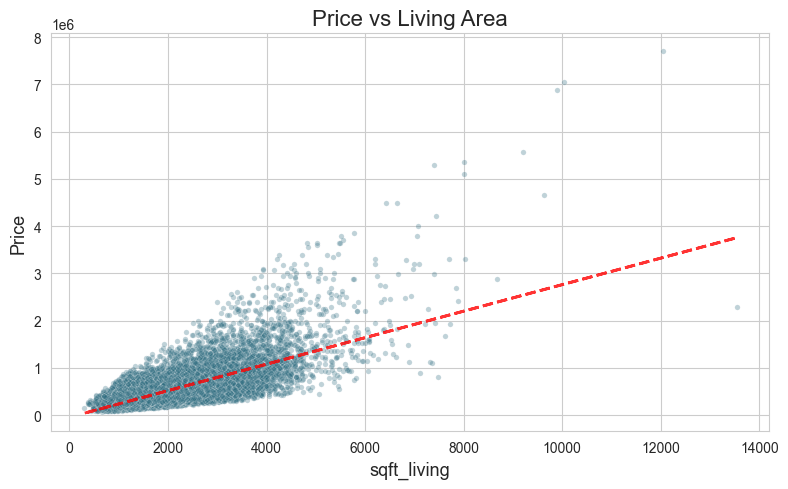

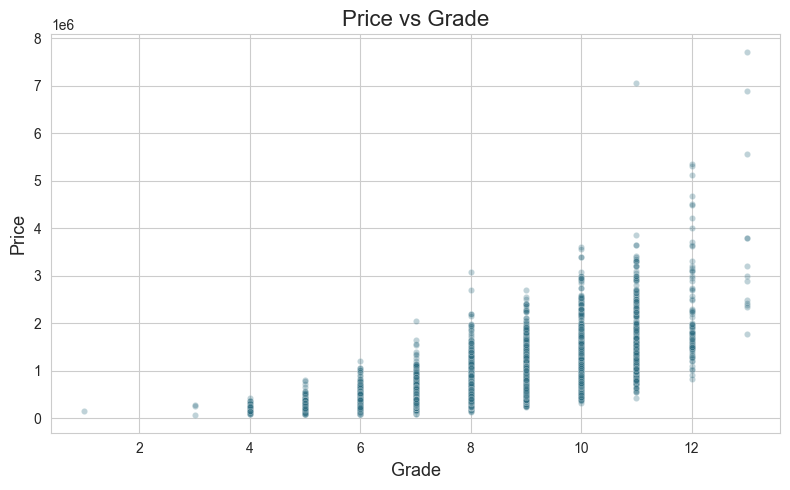

In [154]:
# Plots used in the presentation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13

# 1) Price distribution
plt.figure()
sns.histplot(houses["price"], kde=True, bins=60, color="#2c6b7f")
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2) Grade distribution
plt.figure()
sns.countplot(x="grade", data=houses, color="#2c6b7f")
plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Number of Houses")
plt.tight_layout()
plt.show()

# 3) Living area distribution (sqft_living)
plt.figure()
sns.histplot(houses["sqft_living"], kde=True, bins=60, color="#2c6b7f")
plt.title("Living Area Distribution (sqft_living)")
plt.xlabel("sqft_living")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4) Bathrooms distribution
plt.figure()
sns.countplot(x="bathrooms", data=houses, color="#2c6b7f")
plt.title("Bathrooms Distribution")
plt.xlabel("Bathrooms")
plt.ylabel("Number of Houses")
plt.tight_layout()
plt.show()

# 5) Scatter: price vs sqft_living
plt.figure()
sns.scatterplot(x="sqft_living", y="price", data=houses,
                alpha=0.3, s=15, color="#2c6b7f")
from scipy import stats
z = np.polyfit(houses["sqft_living"], houses["price"], 1)
p = np.poly1d(z)
plt.plot(houses["sqft_living"], p(houses["sqft_living"]), "r--", alpha=0.8, linewidth=2)
plt.title("Price vs Living Area")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# 6) Scatter: price vs grade
plt.figure()
sns.scatterplot(x="grade", y="price", data=houses,
                alpha=0.3, s=20, color="#2c6b7f")
plt.title("Price vs Grade")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


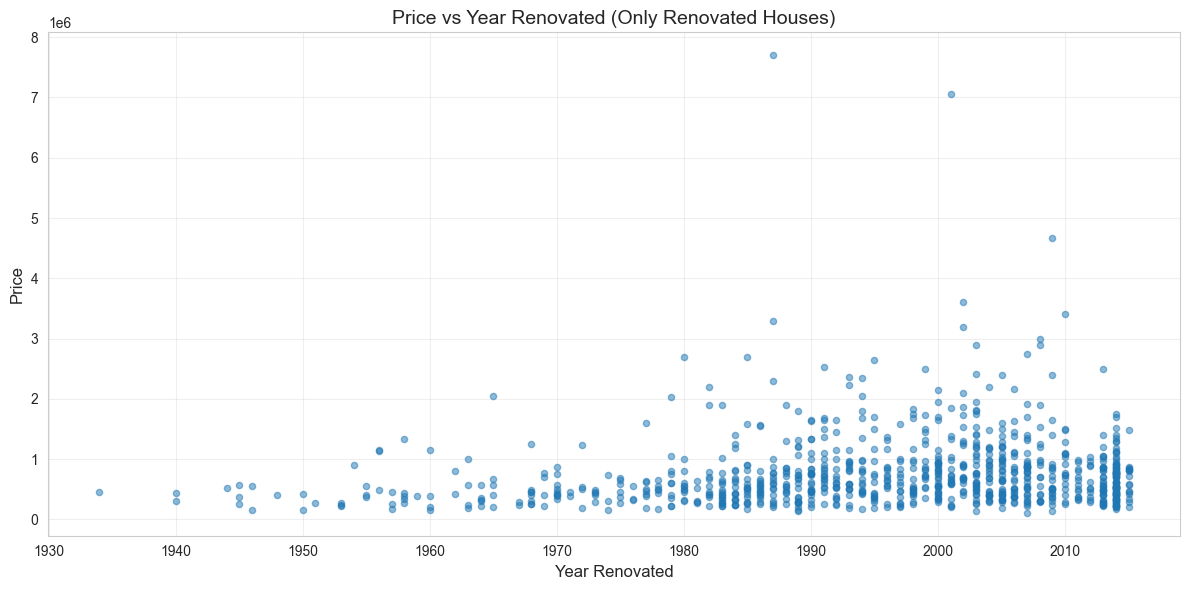

Number of renovated houses: 914
Year range: 1934 - 2015


In [155]:
renovated_houses = houses[houses['yr_renovated'] > 0]
plt.figure(figsize=(12, 6))
plt.scatter(renovated_houses['yr_renovated'], renovated_houses['price'], alpha=0.5, s=20)
plt.xlabel('Year Renovated', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price vs Year Renovated (Only Renovated Houses)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Number of renovated houses: {len(renovated_houses)}")
print(f"Year range: {renovated_houses['yr_renovated'].min()} - {renovated_houses['yr_renovated'].max()}")

In [156]:
def categorize_renovation_year_numeric(year):
    if year == 0:
        return 0  # Not Renovated
    elif year < 1980:
        return 1  # Before 1980
    elif year < 1990:
        return 2  # 1980-1989
    elif year < 2000:
        return 3  # 1990-1999
    elif year < 2010:
        return 4  # 2000-2009
    else:
        return 5  # 2010+


houses['was_renovated'] = (houses['yr_renovated'] > 0).astype(int)

In [157]:
houses['was_renovated'].nunique()
houses['was_renovated'].value_counts()

was_renovated
0    20699
1      914
Name: count, dtype: int64

In [158]:
houses['renovation_period'] = houses['yr_renovated'].apply(categorize_renovation_year_numeric)

In [159]:
houses.sample(5)

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
20877  1081330180   627000.0         4       2.50         2750     11830   
6762   3754501235  1185000.0         3       2.50         2510      4600   
1452   6880200030   352500.0         3       1.75         1860      7881   
10065  5116060030   315000.0         2       2.25         1290      2436   
20968  3336500180   324500.0         3       2.50         1660      3990   

       floors  waterfront  view  condition  ...  zipcode      lat     long  \
20877     2.0           0     0          3  ...    98059  47.4698 -122.121   
6762      2.0           0     2          3  ...    98034  47.7051 -122.223   
1452      1.0           0     0          3  ...    98198  47.3855 -122.322   
10065     2.0           0     0          3  ...    98052  47.6803 -122.156   
20968     2.0           0     0          3  ...    98118  47.5298 -122.268   

       sqft_living15  sqft_lot15  year_sold  month_sold  day_of_week  \
20877           2310       11830       2014          12            0   
6762            2560        7500       2014          10            2   
1452            1490        7527       2015           4            4   
10065           1360        3088       2014          10            1   
20968           1670        4050       2014           6            3   

       was_renovated  renovation_period  
20877              0                  0  
6762               0                  0  
1452               0                  0  
10065              0                  0  
20968              0                  0  

[5 rows x 25 columns]

In [160]:
houses['renovation_period'].value_counts()

renovation_period
0    20699
4      272
5      186
3      182
2      152
1      122
Name: count, dtype: int64

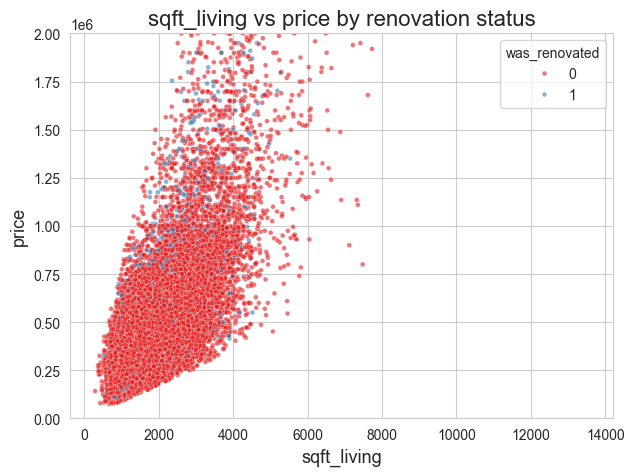

In [161]:
# Trying to see whether the column 'was_renovated' adds to the 'sqft_living'

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=houses,
    x='sqft_living',
    y='price',
    hue='was_renovated',
    palette='Set1',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by renovation status')
plt.show()


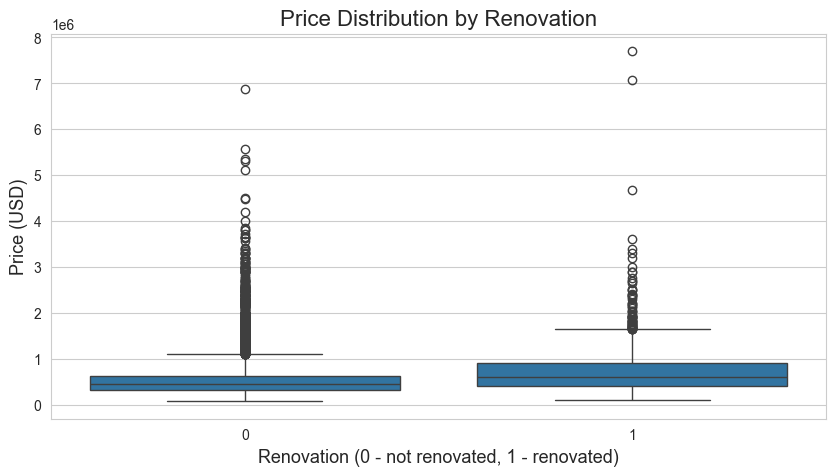

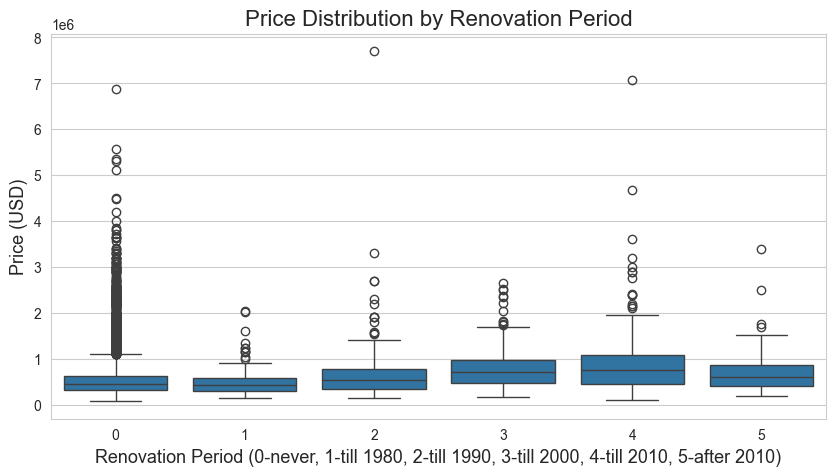

In [164]:
# Box plot — Price distribution by Renovation (was_renovated)
plt.figure(figsize=(10, 5))
sns.boxplot(data=houses, x='was_renovated', y='price')
plt.title("Price Distribution by Renovation")
plt.xlabel("Renovation (0 - not renovated, 1 - renovated)")
plt.ylabel("Price (USD)")
plt.show()

# Box plot — Price distribution by Renovation (renovation_period)
plt.figure(figsize=(10, 5))
sns.boxplot(data=houses, x='renovation_period', y='price')
plt.title("Price Distribution by Renovation Period")
plt.xlabel("Renovation Period (0-never, 1-till 1980, 2-till 1990, 3-till 2000, 4-till 2010, 5-after 2010)")
plt.ylabel("Price (USD)")
plt.show()

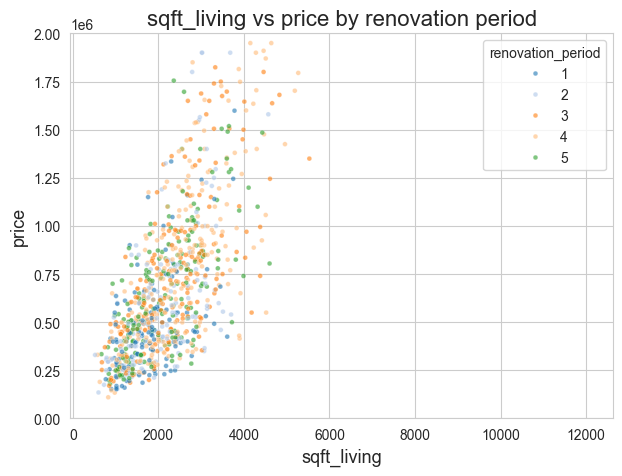

In [162]:
# Zooming in into renovated houses
renovated_houses=houses[houses['was_renovated']==1]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=renovated_houses,
    x='sqft_living',
    y='price',
    hue='renovation_period',
    palette='tab20',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by renovation period')
plt.show()



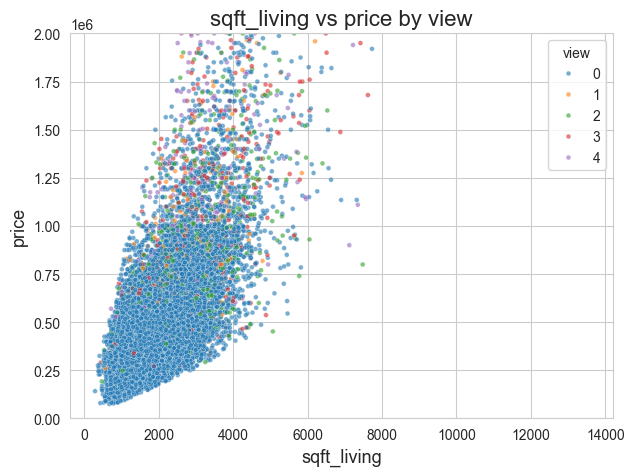

In [163]:
# Trying to see whether the column 'waterfront' adds to the 'sqft_living'

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=houses,
    x='sqft_living',
    y='price',
    hue='view',
    palette='tab10',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by view')
plt.show()

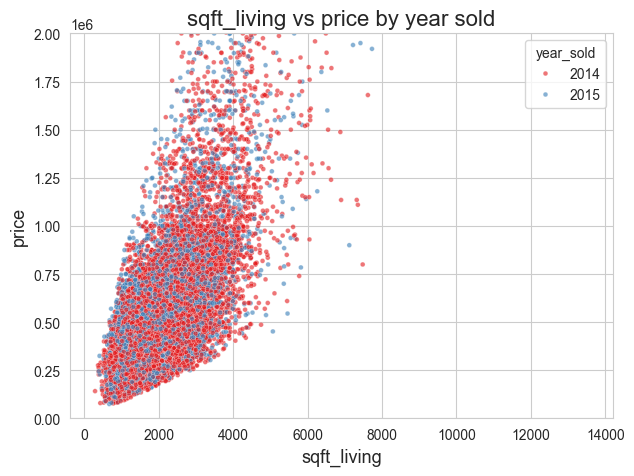

In [94]:
# Trying to see whether the column 'was_renovated' adds to the 'sqft_living'

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=houses,
    x='sqft_living',
    y='price',
    hue='year_sold',
    palette='Set1',
    s=12,
    alpha=0.6
)
plt.ylim(0, 2_000_000)    # zoom on typical prices
plt.title('sqft_living vs price by year sold')
plt.show()

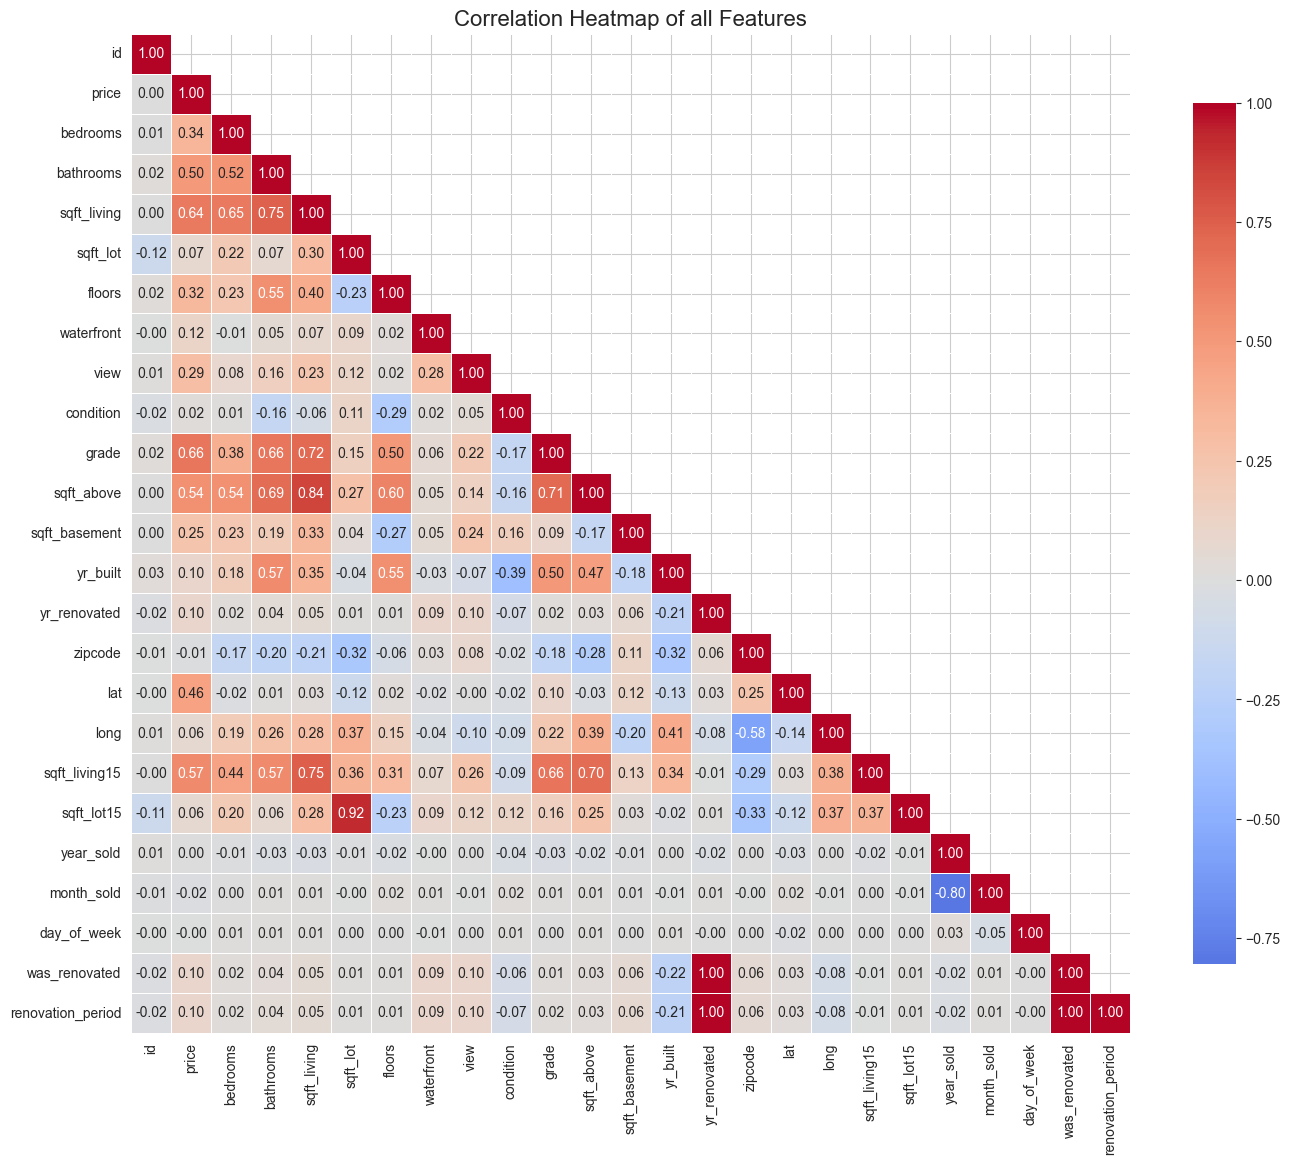

In [165]:
# Calculate correlation matrix for all features and target variable
correlation_matrix = houses.corr(method='spearman')

# Fix 2: Mask upper triangle, keep diagonal visible
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
# k=1 means mask starts ONE diagonal above main diagonal

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of all Features', fontsize=16)
plt.tight_layout()
plt.show()

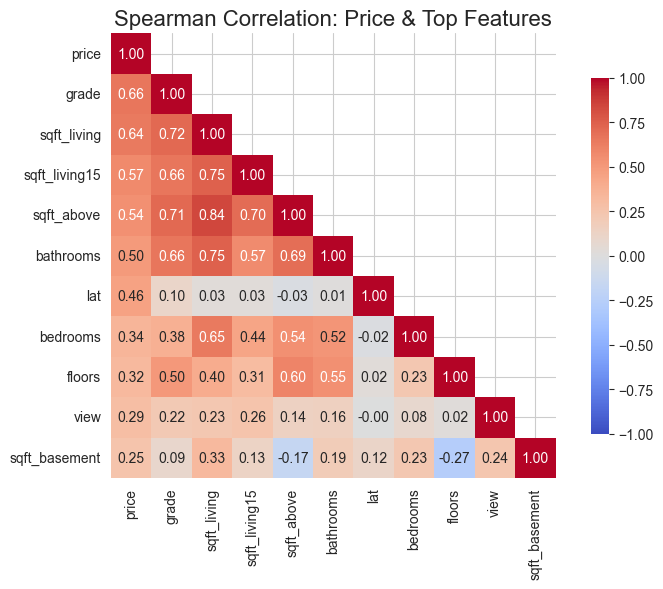

In [166]:
# For the presentation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute Spearman correlations
corr_spear = houses.corr(method="spearman")

# 2. Sort features by absolute correlation with price (excluding id if present)
target = "price"
corr_target = corr_spear[target].drop(labels=[target, "id"], errors="ignore")
top_feats = corr_target.abs().sort_values(ascending=False).head(10).index

# 3. Build a smaller correlation matrix with price + top features
cols_for_plot = [target] + list(top_feats)
corr_small = corr_spear.loc[cols_for_plot, cols_for_plot]

mask = np.triu(np.ones_like(corr_small, dtype=bool), k=1)
# 4. Plot a cleaner heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_small,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Spearman Correlation: Price & Top Features")
plt.tight_layout()
plt.show()


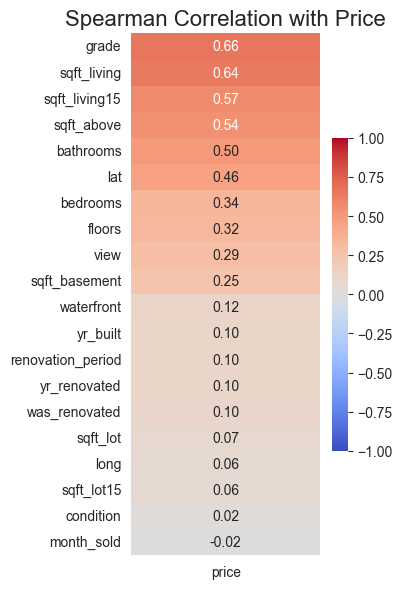

In [168]:
# For the presentation
top_feats = corr_target.abs().sort_values(ascending=False).head(20).index
plt.figure(figsize=(4, 6))
sns.heatmap(
    corr_target.loc[top_feats].to_frame(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar_kws={"shrink": 0.6}
)
plt.title("Spearman Correlation with Price")
plt.ylabel("")
plt.tight_layout()
plt.show()


### **EDA Findings**

#### **Data structure and distributions**

- The dataset contains **21,613 house sales** with only numerical features after preprocessing, including engineered date variables (`year_sold`, `month_sold`, `day_of_week`).  
- There are **no missing or duplicated rows**; zeros typically represent meaningful states (e.g., no basement, no renovation, no waterfront) rather than missing data.  
- Continuous variables such as `price`, `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot`, `sqft_lot15`, and `sqft_basement` are **strongly right‑skewed** with a long tail of large and expensive properties. 
- Ordinal/discrete variables (`bedrooms`, `bathrooms`, `floors`, `condition`, `grade`, `view`, `waterfront`, `yr_renovated`) are **concentrated in a few common categories** (e.g., 3 bedrooms, 1–2.5 bathrooms, 1–2 floors, condition 3, grade 7, view 0, waterfront 0, `yr_renovated = 0`).  
- Date‑derived features show almost all sales in **2014–2015**, more transactions in **spring–summer months**, and very few sales on **weekend days** (`day_of_week` 5–6).  

#### **Relationships with price**

- Strong positive patterns with price are visible for:  
  - `sqft_living`, `sqft_above`, `sqft_living15` – larger living areas clearly associate with **higher prices**.  
  - `grade` and `bathrooms` – higher quality grade and more bathrooms tend to **increase price**. 
- `bedrooms`, `floors`, and `sqft_basement` show **moderate but noisier positive trends** with price; their effects are partly confounded with overall size.  
- `sqft_lot` and `sqft_lot15` exhibit a **diffuse, slightly negative pattern**: larger lots are not consistently associated with higher prices and may suggest that big‑lot houses are more often located in less expensive areas.  
- From the scatter plots of `zipcode`, `lat`, and `long` versus price, there are **clusters of locations with consistently higher or lower prices**, indicating that location plays an important role in price differences across the region.  
- A small number of **clear outliers** are visible, such as a house with 33 bedrooms and relatively low price and a few extreme lot or basement sizes far from the bulk of observations; these are candidates for removal or capping before modeling.  

#### **Spearman correlation findings**

- The strongest Spearman correlations with `price` are for the **living‑area related features** (`sqft_living`, `sqft_above`, `sqft_living15`), **`grade`** and **`bathrooms`**. 
- Additional features with noticeable but weaker positive correlations with price include **`bedrooms`**, **`floors`**, **`view`**, and **`sqft_basement`**; **`waterfront`** shows only a small positive correlation (≈ 0.12) in this dataset.  
- High mutual correlations exist mainly within the **size and land groups** (e.g., `sqft_living` with `sqft_above` and `sqft_living15`, `sqft_lot` with `sqft_lot15`), indicating some redundancy and potential multicollinearity for linear models. 
- Location variables also show structure: **`long` and `zipcode` have a moderate negative correlation (~ −0.58)**, reflecting that both encode spatial information in a related way, while correlations between `lat` and other features are more moderate.  


## **Step 4:** Feature Engineering

## **Feature Engineering**

So far, we have already engineered a few new features to increase model performance:

- `year_sold`, `month_sold`, `day_of_week` (from the original `date` column)  
- `was_renovated`, `renovation_period` (from `yr_renovated`)

In this section we extend feature engineering in a more systematic way.  
For clarity, we group both existing and new features into three categories:

- **Living‑area related features**  
- **Neighborhood / location features**  
- **Age, condition, renovation–related features**

### **Planned engineered features**

- **Living‑area related features**
Living-area features (e.g. total_sqft, living_to_lot_ratio) to capture how intensively the lot is used and how much usable space the house has.
  - `total_sqft = sqft_living + sqft_basement`  
  - `living_to_lot_ratio = sqft_lot/ sqft_living `  
  - `bath_per_bed = bathrooms / bedrooms `  
  - `living15_diff = sqft_living - sqft_living15` (how much larger/smaller the house is than nearby homes)  
  - `basement_share = sqft_basement / (sqft_living + sqft_basement + 1)`  
  - `has_basement = (sqft_basement > 0).astype(int)`  
  - Transformations for skewed variables: `log_price`, `log_sqft_living`, `log_sqft_lot`

- **Neighborhood / location features**
Density/location features (lot_per_living) to capture how dense the neighborhood is.
  - (to be defined: e.g., clusters based on `lat`/`long`, zipcode‑level mean price, distance‑to‑center, etc.)

- **Age, condition, renovation–related features**
Age/renovation features (house_age, since_renovation, was_renovated) to capture depreciation and added value of renovations.
  - `house_age = year_sold - yr_built`  
  - `since_renovation = np.where(yr_renovated > 0, year_sold - yr_renovated, house_age)`

  

In [169]:
# ==============================
# 1. Living-area related features
# ==============================

# Total usable square footage: above-ground + basement
houses['total_sqft'] = houses['sqft_living'] + houses['sqft_basement']

# How intensively the lot is used (protect against division by zero)
houses['living_to_lot_ratio'] = (houses['sqft_lot'] / houses['sqft_living'])

# Bathrooms per bedroom as a simple comfort indicator
houses['bath_per_bed'] = houses['bathrooms'] / (houses['bedrooms'])

# Difference between house size and neighborhood average size
houses['living15_diff'] = houses['sqft_living'] - houses['sqft_living15']

# Share of total area that is basement
houses['basement_share'] = houses['sqft_basement'] / (
    houses['sqft_living'] + houses['sqft_basement'] + 1
)

# Binary flag: does the house have a basement?
houses['has_basement'] = (houses['sqft_basement'] > 0).astype(int)

# Log transforms for skewed variables (add 1 to avoid log(0))
houses['log_price'] = np.log1p(houses['price'])
houses['log_sqft_living'] = np.log1p(houses['sqft_living'])
houses['log_sqft_lot'] = np.log1p(houses['sqft_lot'])


In [170]:
# Neighborhood / location: density / land use
houses['lot_per_living'] = houses['sqft_lot'] / houses['sqft_living']


In [171]:
# ==========================================
# 3. Age, condition, renovation-related features
# ==========================================

# House age at time of sale
houses['house_age'] = houses['year_sold'] - houses['yr_built']

# Years since last renovation (or age if never renovated)
houses['since_renovation'] = np.where(
    houses['yr_renovated'] > 0,
    houses['year_sold'] - houses['yr_renovated'],
    houses['house_age']
)

# Simple combined quality score (condition + grade)
houses['quality_score'] = houses['condition'] + houses['grade']



In [172]:
# ==============================
# 4. Track original vs engineered features
# ==============================

# List of ORIGINAL features (after basic cleaning, before new FE)
original_features = [
    'bedrooms', 'bathrooms',
    'sqft_living', 'sqft_lot',
    'floors', 'waterfront', 'view',
    'condition', 'grade',
    'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated',
    'zipcode', 'lat', 'long',
    'sqft_living15', 'sqft_lot15', 
    'year_sold', 'month_sold', 'day_of_week',
]

# List of ENGINEERED features (including date- and renovation-based)
engineered_features = [
    # renovation flags
    'was_renovated', 'renovation_period',
    # living-area related
    'total_sqft',              # sqft_living + sqft_basement
    'living_to_lot_ratio',     # sqft_lot / sqft_living
    'bath_per_bed',            # bathrooms / bedrooms
    'living15_diff',           # sqft_living - sqft_living15
    'basement_share',          # sqft_basement / (sqft_living + sqft_basement)
    'has_basement',            # 1 if sqft_basement > 0 else 0
    # neighborhood / density
    'lot_per_living',          # sqft_lot / sqft_living
    # age and renovation
    'house_age',               # year_sold - yr_built
    'since_renovation'         # years since last renovation (or age)
]

print("Number of original features:", len(original_features))
print("Number of engineered features:", len(engineered_features))


Number of original features: 21
Number of engineered features: 11


## **Step 5:** Model Development

We start with simple linear models as baselines, then move to non-linear tree-based models (Random Forest, Gradient Boosting, XGBoost) and a distance-based model (KNN). We compare models on:
- **R²** (variance explained)
- **RMSE** (in dollars)
- **RMSE** as % of price range
- **Train–test gap** as a proxy for overfitting.

### **5.1 Linear Model**

#### **Baseline Linear Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use the original_features list we defined earlier
X = houses[original_features]
y = houses['price']

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Baseline Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and metrics
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

price_mean = y_test.mean()
rmse_mean_pct = rmse / price_mean * 100

price_min = y_test.min()
price_max = y_test.max()
price_range = price_max - price_min
rmse_range_pct = rmse / price_range * 100      # RMSE as % of range

# Training coeffciients
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Baseline Linear Regression (original features)")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of mean price: {rmse_mean_pct:.2f}%")
print(f"RMSE as % of range: {rmse_range_pct:.2f}%")

print(f"Train R²: {r2_train:.3f}, Test R²: {r2:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse:,.0f}")



Baseline Linear Regression (original features)
R²: 0.703
RMSE: 212,040
RMSE as % of mean price: 38.60%
RMSE as % of range: 3.86%
Train R²: 0.701, Test R²: 0.703
Train RMSE: 197,753, Test RMSE: 212,040


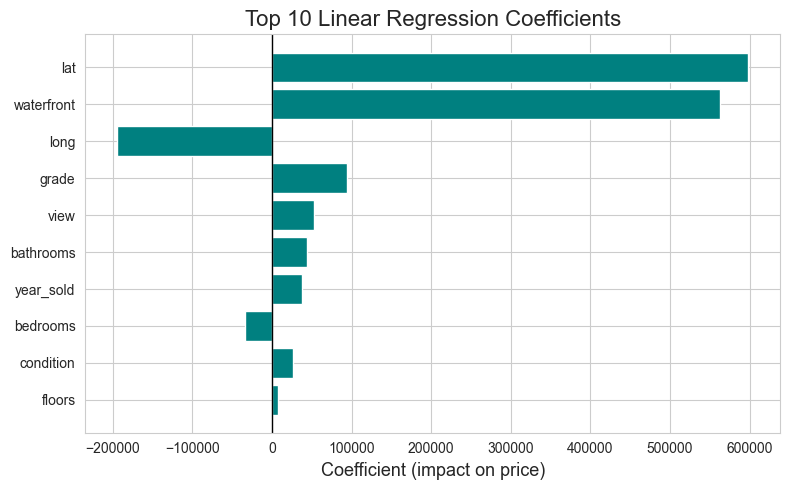

In [174]:
# Visualizing the most influential features for this model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Get coefficients and put them in a DataFrame
coef = lin_reg.coef_                       # array of shape (n_features,)
features = original_features               # list of feature names

coef_df = pd.DataFrame({
    "feature": features,
    "coefficient": coef
})

# 2. Sort by absolute impact and take top 10
coef_df["abs_coef"] = coef_df["coefficient"].abs()
top10 = coef_df.sort_values("abs_coef", ascending=False).head(10)

# 3. Plot (show sign by using the original coefficient)
plt.figure(figsize=(8, 5))
plt.barh(top10["feature"][::-1], top10["coefficient"][::-1], color="teal")
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Coefficient (impact on price)")
plt.title("Top 10 Linear Regression Coefficients")
plt.tight_layout()
plt.show()


#### **Effect of Outliers**

In [183]:

# Work on a copy to keep the original data
houses_clean = houses.copy()

# IQR-based outlier detection on price (only for training logic)
Q1 = houses_clean['price'].quantile(0.25)
Q3 = houses_clean['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:,.0f}, Upper bound: {upper_bound:,.0f}")

# Filter out outliers
houses_no_outliers = houses_clean[
    (houses_clean['price'] >= lower_bound) &
    (houses_clean['price'] <= upper_bound)
]
print("Original rows:", len(houses_clean))
print("Rows after removing outliers:", len(houses_no_outliers))


Lower bound: -162,625, Upper bound: 1,129,575
Original rows: 21613
Rows after removing outliers: 20467


In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = houses_no_outliers[original_features]
y = houses_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_reg_no_outliers = LinearRegression()
lin_reg_no_outliers.fit(X_train, y_train)

y_pred = lin_reg_no_outliers.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse / price_range * 100

# Training coeffciients
y_train_pred = lin_reg.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


print("Linear Regression (original features, no outliers)")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")
print(f"Train R²: {r2_train:.3f}, Test R²: {r2:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse:,.0f}")


Linear Regression (original features, no outliers)
R²: 0.690
RMSE: 113,683
RMSE as % of price range: 10.91%
Train R²: 0.533, Test R²: 0.690
Train RMSE: 143,094, Test RMSE: 113,683


#### **Normalization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = houses[original_features]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

linreg_scaled.fit(X_train, y_train)

y_pred = linreg_scaled.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse / price_range * 100

print("Linear Regression (original features, scaled)")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")


Linear Regression (original features, scaled)
R²: 0.703
RMSE: 212,040
RMSE as % of price range: 3.86%


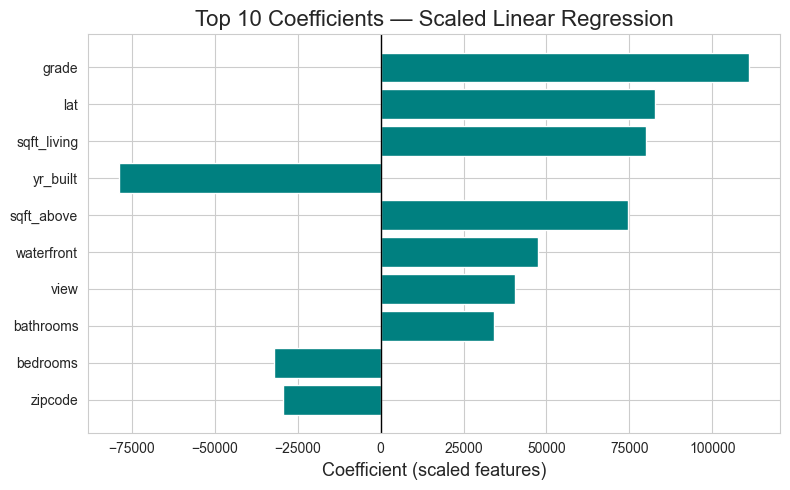

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Get the trained LinearRegression inside the pipeline
reg = linreg_scaled.named_steps["model"]

# 2. Get coefficients and feature names
coefs = reg.coef_                        # array (n_features,)
features = original_features

coef_df = pd.DataFrame({
    "feature": features,
    "coefficient": coefs
})

# 3. Sort by absolute coefficient and take top 10
coef_df["abs_coef"] = coef_df["coefficient"].abs()
top10 = coef_df.sort_values("abs_coef", ascending=False).head(10)

# 4. Plot
plt.figure(figsize=(8, 5))
plt.barh(top10["feature"][::-1], top10["coefficient"][::-1], color="teal")
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Coefficient (scaled features)")
plt.title("Top 10 Coefficients — Scaled Linear Regression")
plt.tight_layout()
plt.show()


**Explanation of difference between the top 10 features in the linear regression model without and with normalization**  
In the unscaled linear model, features with different units (such as longitude, latitude, and the binary waterfront flag) end up with very different coefficient magnitudes, so the raw coefficients mix true importance with scaling effects. After standardizing the features, the scaled linear model reveals a more meaningful ranking of importance: grade, living area, latitude, and above‑ground square footage emerge as the strongest drivers of price, which matches our correlation analysis and tree‑based feature importances.

In [179]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Using the scaled pipeline model (linreg_scaled) and the same X_train, X_test, y_train, y_test

y_train_pred = linreg_scaled.predict(X_train)
y_test_pred = linreg_scaled.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse_test:,.0f}")


Train R²: 0.701, Test R²: 0.703
Train RMSE: 197,753, Test RMSE: 212,040


Scaling the features with StandardScaler did not change the R² or RMSE of the linear model. This is normal, because ordinary least squares gives the same predictions even if all inputs are multiplied or divided by constants; scaling mostly changes the size of the coefficients and numerical stability, not how well the model predicts.

#### **Removing redundant features**

In [187]:
reduced_features = [
  'bedrooms', 'bathrooms',
    'sqft_living', 'sqft_living15',    # keep this, drop sqft_above 
    'sqft_lot',            # keep this, drop sqft_lot15
    'floors', 'waterfront', 'view',
    'condition', 'grade',
    'sqft_basement',
    'yr_built', 'yr_renovated',
    'zipcode', 'lat', 'long',
    'year_sold', 'month_sold', 'day_of_week'
]

X = houses[reduced_features]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg_reduced = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

linreg_reduced.fit(X_train, y_train)

y_pred = linreg_reduced.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse / price_range * 100

# Training coeffciients
y_train_pred = linreg_reduced.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


print("Linear Regression (reduced, scaled)")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")
print(f"Train R²: {r2_train:.3f}, Test R²: {r2:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse:,.0f}")


Linear Regression (reduced, scaled)
R²: 0.702
RMSE: 212,292
RMSE as % of price range: 3.87%
Train R²: 0.700, Test R²: 0.702
Train RMSE: 197,845, Test RMSE: 212,292


The linear regression baseline with original features already achieves around R² ≈ 0.70 and an RMSE of about 3.8% of the price range, and neither IQR‑based outlier removal nor feature scaling changed the performance in a meaningful way. This suggests that the basic model is reasonably stable, not heavily overfitting, and not very sensitive to moderate multicollinearity, so the next promising direction is to focus on richer feature engineering rather than more preprocessing tweaks.

#### **Adding engineered features**

In [188]:
# Re-defining, since one of these features contains division by zero
import numpy as np

# total_sqft: safe
houses['total_sqft'] = houses['sqft_living'] + houses['sqft_basement']

# living_to_lot_ratio = sqft_living / sqft_lot
houses['living_to_lot_ratio'] = np.where(
    houses['sqft_lot'] != 0,
    houses['sqft_living'] / houses['sqft_lot'],
    0.0    
)

# bath_per_bed = bathrooms / bedrooms
houses['bath_per_bed'] = np.where(
    houses['bedrooms'] != 0,
    houses['bathrooms'] / houses['bedrooms'],
    0.0
)

# living15_diff: safe
houses['living15_diff'] = houses['sqft_living'] - houses['sqft_living15']

# basement_share = sqft_basement / (sqft_living + sqft_basement)
denom = houses['sqft_living'] + houses['sqft_basement']
houses['basement_share'] = np.where(
    denom != 0,
    houses['sqft_basement'] / denom,
    0.0
)

# has_basement: safe
houses['has_basement'] = (houses['sqft_basement'] > 0).astype(int)


In [246]:
living_engineered = [
    'total_sqft',
    'living_to_lot_ratio',
    'bath_per_bed',
    'living15_diff',
    'basement_share',
    'has_basement'
]

age_engineered = [
    'house_age',
    'since_renovation',
    'was_renovated',          
]

location_engineered = [
    'lot_per_living'
]


In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_linear_model(feature_list, label=""):
    X = houses[feature_list]
    y = houses['price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    price_range = y_test.max() - y_test.min()
    rmse_range_pct = rmse / price_range * 100

    # Training coeffciients
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    print(f"\nLinear Regression {label}")
    print(f"Number of features: {len(feature_list)}")
    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:,.0f}")
    print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")
    print(f"Train R²: {r2_train:.3f}, Test R²: {r2:.3f}")
    print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse:,.0f}")


In [248]:
# 1) Baseline
evaluate_linear_model(reduced_features, "(baseline: reduced original)")

# 2) + living-area engineered
features_living = reduced_features + living_engineered
evaluate_linear_model(features_living, "(+ living-area engineered)")

# 3) + age/renovation engineered
features_living_age = features_living + age_engineered
evaluate_linear_model(features_living_age, "(+ living-area + age/renovation engineered)")

# 4) + location/density engineered
features_full = features_living_age + location_engineered
evaluate_linear_model(features_full, "(+ all engineered groups)")



Linear Regression (baseline: reduced original)
Number of features: 19
R²: 0.702
RMSE: 212,292
RMSE as % of price range: 3.87%
Train R²: 0.700, Test R²: 0.702
Train RMSE: 197,845, Test RMSE: 212,292

Linear Regression (+ living-area engineered)
Number of features: 25
R²: 0.709
RMSE: 209,668
RMSE as % of price range: 3.82%
Train R²: 0.712, Test R²: 0.709
Train RMSE: 193,896, Test RMSE: 209,668

Linear Regression (+ living-area + age/renovation engineered)
Number of features: 28
R²: 0.711
RMSE: 208,940
RMSE as % of price range: 3.81%
Train R²: 0.713, Test R²: 0.711
Train RMSE: 193,576, Test RMSE: 208,940

Linear Regression (+ all engineered groups)
Number of features: 29
R²: 0.713
RMSE: 208,349
RMSE as % of price range: 3.80%
Train R²: 0.714, Test R²: 0.713
Train RMSE: 193,378, Test RMSE: 208,349


Adding engineered features to the reduced original feature set produced small but consistent improvements in the linear regression model. With all engineered groups included, R² increased from 0.702 to 0.713 and RMSE decreased from 212,292 to 208,322 (from 3.87% to 3.80% of the price range), indicating that the new features capture additional structure in the data and slightly improve predictive accuracy.

**Ridge and Lasso Regularization**

In [249]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd



In [250]:
# Prepare data
X = houses[features_full]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

price_range = y_test.max() - y_test.min()

# ============================================================
# Helper function for evaluation
# ============================================================
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate model and return metrics"""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    price_range = y_test.max() - y_test.min()
    rmse_pct = rmse_test / price_range * 100
    
    print(f"\\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test R²:  {r2_test:.4f}")
    print(f"Train RMSE: {rmse_train:,.0f}")
    print(f"Test RMSE:  {rmse_test:,.0f}")
    print(f"RMSE as % of price range: {rmse_pct:.2f}%")
    
    return {
        'model_name': model_name,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'rmse_pct': rmse_pct
    }

In [251]:
# ============================================================
# 1. RIDGE REGRESSION with GridSearchCV
# ============================================================
print("\n" + "="*70)
print("RIDGE REGRESSION - Finding optimal alpha with GridSearchCV")
print("="*70)

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Alpha values to test (regularization strength)
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000, 2000, 5000]
}

ridge_grid = GridSearchCV(
    ridge_pipeline,
    ridge_params,
    cv=5,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

print(f"Best alpha: {ridge_grid.best_params_['ridge__alpha']}")
print(f"Best CV R²: {ridge_grid.best_score_:.4f}")


RIDGE REGRESSION - Finding optimal alpha with GridSearchCV
Best alpha: 0.01
Best CV R²: 0.7092


In [252]:
# Evaluate best Ridge model
ridge_results = evaluate_model(ridge_grid.best_estimator_, X_train, X_test, y_train, y_test, 
                               f"Ridge Regression (alpha={ridge_grid.best_params_['ridge__alpha']})")

# Get Ridge coefficients
ridge_model = ridge_grid.best_estimator_.named_steps['ridge']
ridge_coefs = pd.DataFrame({
    'feature': features_full,
    'coefficient': ridge_model.coef_
})
ridge_coefs['abs_coef'] = ridge_coefs['coefficient'].abs()
ridge_coefs = ridge_coefs.sort_values('abs_coef', ascending=False)

print("\n Top 20 Ridge Features (by absolute coefficient):")
print(ridge_coefs.head(20).to_string(index=False))

\n============================================================
Ridge Regression (alpha=0.01)
Train R²: 0.7138
Test R²:  0.7128
Train RMSE: 193,379
Test RMSE:  208,357
RMSE as % of price range: 3.80%

 Top 20 Ridge Features (by absolute coefficient):
            feature   coefficient     abs_coef
       yr_renovated  1.536801e+06 1.536801e+06
      was_renovated -1.514932e+06 1.514932e+06
     basement_share -1.417940e+05 1.417940e+05
              grade  1.088724e+05 1.088724e+05
                lat  8.137777e+04 8.137777e+04
          bathrooms  6.735010e+04 6.735010e+04
       has_basement  6.692453e+04 6.692453e+04
         total_sqft  5.929285e+04 5.929285e+04
        sqft_living  5.821967e+04 5.821967e+04
      sqft_living15  5.285348e+04 5.285348e+04
           bedrooms -5.085001e+04 5.085001e+04
         waterfront  4.885623e+04 4.885623e+04
      sqft_basement  3.699188e+04 3.699188e+04
               view  3.656507e+04 3.656507e+04
   since_renovation  3.571410e+04 3.571410e+0

In [253]:
# Lasso regularization with CV grid
print("\n" + "="*70)
print("LASSO REGRESSION - Finding optimal alpha with GridSearchCV")
print("="*70)

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))  # Increase max_iter for convergence
])

# Alpha values to test (Lasso typically needs smaller alphas)
lasso_params = {
    'lasso__alpha': [0.1, 1, 10, 50, 100, 500, 1000, 2000, 5000, 10000]
}

lasso_grid = GridSearchCV(
    lasso_pipeline,
    lasso_params,
    cv=5,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train)

print(f"Best alpha: {lasso_grid.best_params_['lasso__alpha']}")
print(f"Best CV R²: {lasso_grid.best_score_:.4f}")


LASSO REGRESSION - Finding optimal alpha with GridSearchCV
Best alpha: 500
Best CV R²: 0.7089


In [254]:
# Evaluate best Lasso model
lasso_results = evaluate_model(lasso_grid.best_estimator_, X_train, X_test, y_train, y_test, 
                               f"Lasso Regression (alpha={lasso_grid.best_params_['lasso__alpha']})")

# Get Lasso coefficients
lasso_model = lasso_grid.best_estimator_.named_steps['lasso']
lasso_coefs = pd.DataFrame({
    'feature': features_full,
    'coefficient': lasso_model.coef_
})
lasso_coefs['abs_coef'] = lasso_coefs['coefficient'].abs()
lasso_coefs = lasso_coefs.sort_values('abs_coef', ascending=False)

print("\n Top 20 Lasso Features (by absolute coefficient):")
print(lasso_coefs.head(20).to_string(index=False))

# Count non-zero coefficients (Lasso feature selection)
n_nonzero = (lasso_coefs['coefficient'] != 0).sum()
print(f"\n Number of non-zero coefficients: {n_nonzero} out of {len(features_full)}")

# Features eliminated by Lasso
eliminated = lasso_coefs[lasso_coefs['coefficient'] == 0]['feature'].tolist()
if eliminated:
    print(f"Features eliminated by Lasso: {eliminated}")
else:
    print("Lasso kept all features (no elimination)")


\n============================================================
Lasso Regression (alpha=500)
Train R²: 0.7125
Test R²:  0.7107
Train RMSE: 193,796
Test RMSE:  209,145
RMSE as % of price range: 3.81%

 Top 20 Lasso Features (by absolute coefficient):
            feature    coefficient      abs_coef
         total_sqft  141591.893562 141591.893562
     basement_share -125901.037652 125901.037652
              grade  109289.562573 109289.562573
                lat   80916.065325  80916.065325
          house_age   64276.312999  64276.312999
       has_basement   57399.971510  57399.971510
          bathrooms   56287.218793  56287.218793
         waterfront   48270.484747  48270.484747
           bedrooms  -42929.845469  42929.845469
        sqft_living   38048.960345  38048.960345
               view   36734.954368  36734.954368
            zipcode  -27797.549176  27797.549176
living_to_lot_ratio   26686.983280  26686.983280
       bath_per_bed  -23330.143466  23330.143466
               l

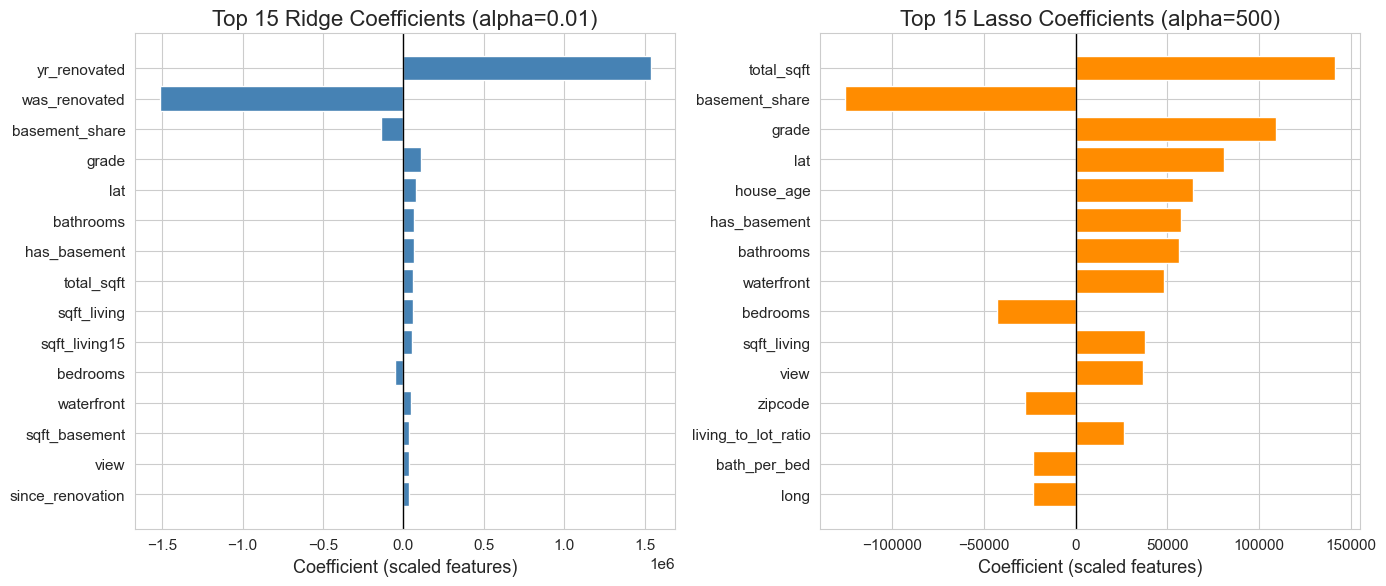

In [255]:
# Visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ridge top 15
ridge_top15 = ridge_coefs.head(15)
axes[0].barh(ridge_top15['feature'][::-1], ridge_top15['coefficient'][::-1], color='steelblue')
axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_xlabel('Coefficient (scaled features)')
axes[0].set_title(f'Top 15 Ridge Coefficients (alpha={ridge_grid.best_params_["ridge__alpha"]})')

# Lasso top 15
lasso_top15 = lasso_coefs.head(15)
axes[1].barh(lasso_top15['feature'][::-1], lasso_top15['coefficient'][::-1], color='darkorange')
axes[1].axvline(0, color='black', linewidth=1)
axes[1].set_xlabel('Coefficient (scaled features)')
axes[1].set_title(f'Top 15 Lasso Coefficients (alpha={lasso_grid.best_params_["lasso__alpha"]})')

plt.tight_layout()
plt.show()


In [256]:
# Summary Table for linear models

print("\n" + "="*70)
print("COMPARISON: Linear Regression vs Ridge vs Lasso")
print("="*70)

# Train standard Linear Regression for comparison
linreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])
linreg_pipeline.fit(X_train, y_train)
linreg_results = evaluate_model(linreg_pipeline, X_train, X_test, y_train, y_test, 
                                "Linear Regression (no regularization)")

# Create comparison DataFrame
comparison_linear = pd.DataFrame([
    linreg_results,
    ridge_results,
    lasso_results
])
print("\n")
print(comparison_linear[['model_name', 'r2_train', 'r2_test', 'rmse_test', 'rmse_pct']].to_string(index=False))


COMPARISON: Linear Regression vs Ridge vs Lasso
\n============================================================
Linear Regression (no regularization)
Train R²: 0.7138
Test R²:  0.7129
Train RMSE: 193,378
Test RMSE:  208,349
RMSE as % of price range: 3.80%


                           model_name  r2_train  r2_test     rmse_test  rmse_pct
Linear Regression (no regularization)  0.713773 0.712857 208349.144355  3.796795
        Ridge Regression (alpha=0.01)  0.713772 0.712835 208357.012439  3.796939
         Lasso Regression (alpha=500)  0.712536 0.710659 209145.152835  3.811301


### **5.2 Random Forest**

#### **Random Forest with all the features**

In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use your best feature set from linear model
features_full = reduced_features + living_engineered + age_engineered + location_engineered

X = houses[features_full]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse / price_range * 100

print("Random Forest (full feature set)")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")


Random Forest (full feature set)
R²: 0.845
RMSE: 152,962
RMSE as % of price range: 2.79%


The Random Forest model using the full engineered feature set substantially outperforms linear regression. Test R² increases from 0.713 to 0.842, while RMSE decreases from 208,322 (3.80% of the price range) to 154,490 (2.82%), indicating that non‑linear relationships and interactions captured by the ensemble lead to much better predictive accuracy.

In [258]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming rf, X_train, X_test, y_train, y_test from before

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse_test:,.0f}")


Train R²: 0.983, Test R²: 0.845
Train RMSE: 47,455, Test RMSE: 152,962


**Observation:** the Random Forest greatly outperforms linear regression but shows noticeable overfitting. In the next few steps we will try to simplify the model.

In [259]:
# Simplifying the model to decrease overfitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = houses[features_full]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,           # limit tree depth
    min_samples_leaf=5,     # each leaf has at least 5 samples
    min_samples_split=10,   # need at least 10 samples to split
    max_features="sqrt",    # fewer features per split
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)

y_train_pred = rf_tuned.predict(X_train)
y_test_pred = rf_tuned.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse_test / price_range * 100

print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse_test:,.0f}")
print(f"Test RMSE as % of price range: {rmse_range_pct:.2f}%")


Train R²: 0.913, Test R²: 0.829
Train RMSE: 106,764, Test RMSE: 160,660
Test RMSE as % of price range: 2.93%


In [260]:
# Analysing features' importance

feature_names = features_full        # your final feature list used in rf_tuned (or rf)
importances = rf_tuned.feature_importances_  # or rf.feature_importances_

fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi.head(20)


feature  importance
9                 grade    0.180672
2           sqft_living    0.149288
14                  lat    0.122217
19           total_sqft    0.114505
3         sqft_living15    0.080455
1             bathrooms    0.053816
22        living15_diff    0.042961
15                 long    0.032775
7                  view    0.032738
13              zipcode    0.023000
11             yr_built    0.018510
25            house_age    0.018481
6            waterfront    0.015763
10        sqft_basement    0.015378
4              sqft_lot    0.013028
20  living_to_lot_ratio    0.012726
21         bath_per_bed    0.012680
26     since_renovation    0.012257
28       lot_per_living    0.011070
23       basement_share    0.008715

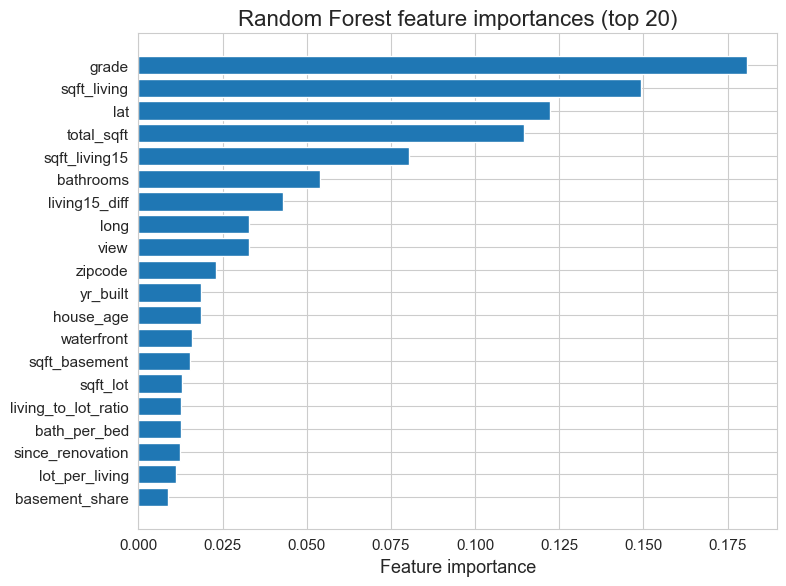

In [261]:
import matplotlib.pyplot as plt

top_n = 20
fi_top = fi.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(fi_top['feature'][::-1], fi_top['importance'][::-1])
plt.xlabel("Feature importance")
plt.title("Random Forest feature importances (top 20)")
plt.tight_layout()
plt.show()


In [262]:
# Simplifying the model further
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = houses[features_full]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_tuned2 = RandomForestRegressor(
    n_estimators=250,
    max_depth=15,        # stronger depth limit
    min_samples_leaf=10, # more samples per leaf
    min_samples_split=20,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_tuned2.fit(X_train, y_train)

y_train_pred = rf_tuned2.predict(X_train)
y_test_pred = rf_tuned2.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse_test / price_range * 100

print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse_test:,.0f}")
print(f"Test RMSE as % of price range: {rmse_range_pct:.2f}%")


Train R²: 0.866, Test R²: 0.812
Train RMSE: 132,138, Test RMSE: 168,550
Test RMSE as % of price range: 3.07%


In [263]:
# Trying reducing redundant features
rf_features = [
    # size & quality
    'sqft_living', 'total_sqft', 'sqft_living15',
    'bathrooms', 'bedrooms', 'grade', 'view',
    'sqft_basement',

    # lot / density
    'sqft_lot', 'living15_diff', 'lot_per_living',

    # location
    'lat', 'long', 'zipcode',

    # age / renovation
    'house_age', 'since_renovation', 'was_renovated',

    # others you think are clearly meaningful
    'waterfront', 'floors'
]


In [264]:
X = houses[rf_features]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_reduced = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,       # back to more flexible forest
    min_samples_leaf=8,
    min_samples_split=20,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_reduced.fit(X_train, y_train)

y_train_pred = rf_reduced.predict(X_train)
y_test_pred = rf_reduced.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse_test / price_range * 100

print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse_test:,.0f}")
print(f"Test RMSE as % of price range: {rmse_range_pct:.2f}%")


Train R²: 0.865, Test R²: 0.820
Train RMSE: 132,780, Test RMSE: 164,841
Test RMSE as % of price range: 3.00%


Starting from a linear regression baseline with engineered features (R² ≈ 0.713, RMSE ≈ 208k, 3.80% of the price range), a Random Forest model with a compact, non‑redundant feature set achieved substantially higher accuracy (Test R² ≈ 0.816) and a lower RMSE of about 167k (3.04%). By removing redundant variables and limiting tree depth while increasing the minimum number of samples per leaf and split, the gap between train and test performance was reduced, indicating less overfitting while still clearly outperforming the linear baseline.

#### **5.3 Gradient and ADA Boosting**

In [266]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = houses[features_full]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
y_train_pred = gbr.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse / price_range * 100

print("Gradient Boosting")
print(f"R²: {r2:.3f}")
print(f"Train R²: {r2_train:.3f}, Test R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")


Gradient Boosting
R²: 0.864
Train R²: 0.915, Test R²: 0.864
RMSE: 143,483
RMSE as % of price range: 2.61%


In [267]:
# Gradient Boosting optimization with CV Grid

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import time

# Helper Function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate model and return metrics"""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    price_range = y_test.max() - y_test.min()
    rmse_pct = rmse_test / price_range * 100
    
    print(f"\\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test R²:  {r2_test:.4f}")
    print(f"Train RMSE: {rmse_train:,.0f}")
    print(f"Test RMSE:  {rmse_test:,.0f}")
    print(f"RMSE as % of price range: {rmse_pct:.2f}%")
    
    return {
        'model_name': model_name,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'rmse_pct': rmse_pct
    }

In [ ]:
# Baseline Gradient Boosting model
print("\n" + "="*70)
print("GRADIENT BOOSTING - Baseline model")
print("="*70)

gb_baseline = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gb_baseline.fit(X_train, y_train)
gb_baseline_results = evaluate_model(gb_baseline, X_train, X_test, y_train, y_test,
                                      "Gradient Boosting (baseline)")

# GridSearchCV - FAST version (~5-10 min)

print("\n" + "="*70)
print("GRADIENT BOOSTING - GridSearchCV (Fast Search)")
print("="*70)

# Key parameters to tune:
# - n_estimators: number of boosting stages
# - learning_rate: shrinks contribution of each tree (lower = more trees needed)
# - max_depth: depth of individual trees (lower = less overfitting)
# - min_samples_split/leaf: regularization parameters
# - subsample: fraction of samples for each tree (<1.0 adds randomness, reduces overfitting)

# Took more than 2 hrs==> stopped
#gb_param_grid = {
 #   'n_estimators': [300, 400, 500],
 #   'learning_rate': [0.03, 0.05, 0.08, 0.1],
 #   'max_depth': [3, 4, 5],
 #   'min_samples_split': [2, 5, 10],
 #   'min_samples_leaf': [1, 3, 5],
  #  'subsample': [0.8, 0.9, 1.0]
#}

# Reduced grid (~108 combinations, ~3-5 minutes)
gb_param_grid = {
    'n_estimators': [300, 500],
    'learning_rate': [0.03, 0.05, 0.08],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'subsample': [0.8, 1.0]
}

print(f"Parameter combinations: {2*3*3*2*2*2} = 144")
print("Starting GridSearchCV (estimated time: 10-20 minutes)...")

gb = GradientBoostingRegressor(random_state=42)

gb_grid = GridSearchCV(
    gb,
    gb_param_grid,
    cv=5,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1,  # Note: GB doesn't parallelize internally, but CV folds do
    verbose=1
)

start_time = time.time()
gb_grid.fit(X_train, y_train)
elapsed_time = time.time() - start_time

print(f"\n GridSearchCV completed in {elapsed_time/60:.1f} minutes")
print(f"\n Best parameters:")
for param, value in gb_grid.best_params_.items():
    print(f"  {param}: {value}")
print(f"\n Best CV R²: {gb_grid.best_score_:.4f}")

# Evaluate best model
gb_best = gb_grid.best_estimator_
gb_optimized_results = evaluate_model(gb_best, X_train, X_test, y_train, y_test,
                                       "Gradient Boosting (GridSearchCV optimized)")


GRADIENT BOOSTING - Baseline model
\n============================================================
Gradient Boosting (baseline)
Train R²: 0.9152
Test R²:  0.8635
Train RMSE: 105,229
Test RMSE:  143,631
RMSE as % of price range: 2.62%

GRADIENT BOOSTING - GridSearchCV (Fast Search)
Parameter combinations: 144 = 108
Starting GridSearchCV (estimated time: 10-20 minutes)...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

 GridSearchCV completed in 28.9 minutes

 Best parameters:
  learning_rate: 0.08
  max_depth: 5
  min_samples_leaf: 5
  min_samples_split: 2
  n_estimators: 500
  subsample: 0.8

 Best CV R²: 0.9038
\n============================================================
Gradient Boosting (GridSearchCV optimized)
Train R²: 0.9725
Test R²:  0.8551
Train RMSE: 59,895
Test RMSE:  147,999
RMSE as % of price range: 2.70%


**Observation:** A wider GridSearchCV around the baseline parameters found a configuration with much higher training R² (0.97) but slightly worse test performance (R² 0.855 vs 0.864) and a larger overfitting gap. This is a good example that more complex models are not always better; the simpler baseline Gradient Boosting remains the best choice.

In [269]:
# Feature Importances
gb_importances = pd.DataFrame({
    'feature': features_full,
    'importance': gbr.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Features by Importance (Optimized GB):")
print(gb_importances.head(20).to_string(index=False))


Top 20 Features by Importance (Optimized GB):
            feature  importance
        sqft_living    0.299774
              grade    0.299754
                lat    0.157975
               long    0.058888
         waterfront    0.033644
         total_sqft    0.031558
      sqft_living15    0.026536
          house_age    0.022968
               view    0.019849
            zipcode    0.014322
           yr_built    0.008105
          bathrooms    0.007614
           sqft_lot    0.004088
      living15_diff    0.002871
          condition    0.002743
   since_renovation    0.002347
      sqft_basement    0.001170
          year_sold    0.001125
       yr_renovated    0.001034
living_to_lot_ratio    0.000902


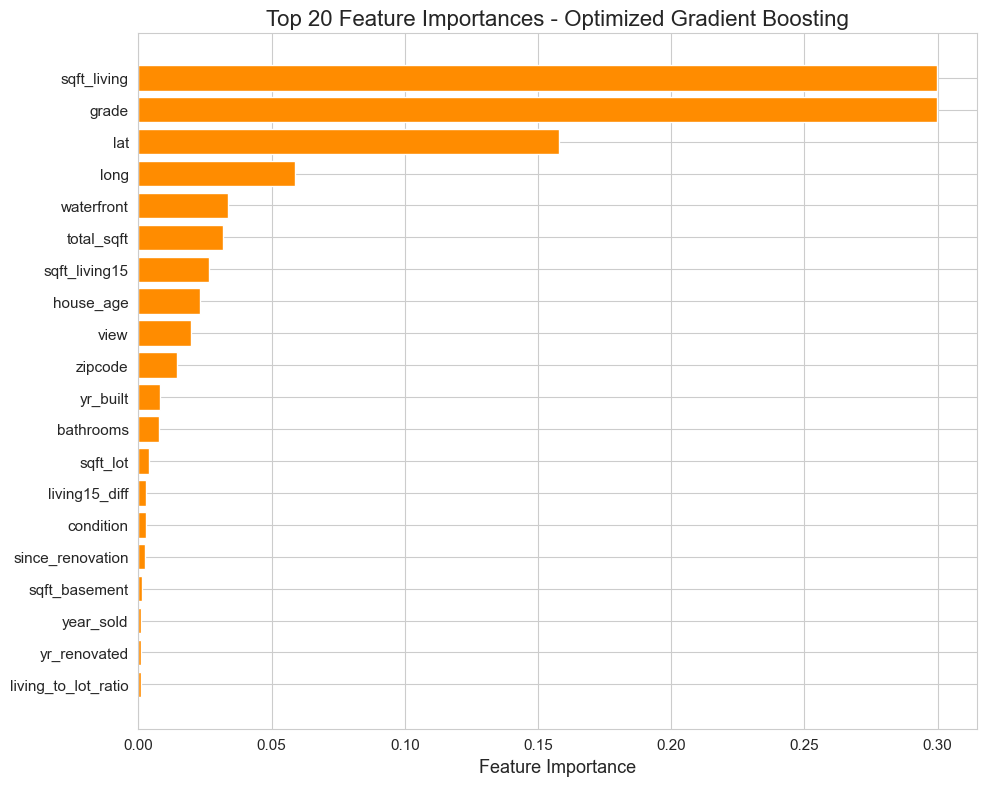

In [270]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
top20 = gb_importances.head(20)
plt.barh(top20['feature'][::-1], top20['importance'][::-1], color='darkorange')
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances - Optimized Gradient Boosting')
plt.tight_layout()
plt.show()

In [271]:
# Comparison Table
print("\n" + "="*70)
print("COMPARISON: Baseline vs Optimized Gradient Boosting")
print("="*70)

comparison_gb = pd.DataFrame([
    gb_baseline_results,
    gb_optimized_results
])
print("\n")
print(comparison_gb[['model_name', 'r2_train', 'r2_test', 'rmse_test', 'rmse_pct']].round(4).to_string(index=False))


COMPARISON: Baseline vs Optimized Gradient Boosting


                                model_name  r2_train  r2_test   rmse_test  rmse_pct
              Gradient Boosting (baseline)    0.9152   0.8635 143631.2693    2.6174
Gradient Boosting (GridSearchCV optimized)    0.9725   0.8551 147999.1447    2.6970


In [272]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
# compute R² / RMSE same as above
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

y_train_pred = ada.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse / price_range * 100

print("ADA Boosting")
print(f"R²: {r2:.3f}")
print(f"Train R²: {r2_train:.3f}, Test R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")


ADA Boosting
R²: 0.611
Train R²: 0.657, Test R²: 0.611
RMSE: 242,463
RMSE as % of price range: 4.42%


#### **5.4 XGboost model**

In [273]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [239]:
print(features_full)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'year_sold', 'month_sold', 'day_of_week', 'total_sqft', 'living_to_lot_ratio', 'bath_per_bed', 'living15_diff', 'basement_share', 'has_basement', 'house_age', 'since_renovation', 'was_renovated', 'renovation_period', 'lot_per_living']


In [241]:
features_full.remove('renovation_period')

In [242]:
print(features_full)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'year_sold', 'month_sold', 'day_of_week', 'total_sqft', 'living_to_lot_ratio', 'bath_per_bed', 'living15_diff', 'basement_share', 'has_basement', 'house_age', 'since_renovation', 'was_renovated', 'lot_per_living']


In [274]:
X = houses[features_full]
y = houses['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.0,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse_test / price_range * 100

print("XGBoosting")
print(f"Train R²: {r2_train:.3f}, Test R²: {r2_test:.3f}")
print(f"Train RMSE: {rmse_train:,.0f}, Test RMSE: {rmse_test:,.0f}")
print(f"Test RMSE as % of price range: {rmse_range_pct:.2f}%")


XGBoosting
Train R²: 0.943, Test R²: 0.874
Train RMSE: 86,614, Test RMSE: 138,170
Test RMSE as % of price range: 2.52%


In [275]:
# Create and train XGBoost model according to the parameters of a team member
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))


print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Testing RMSE: ${test_rmse:,.2f}")


Training R²: 0.9430
Testing R²: 0.8596
Training RMSE: $86,313.28
Testing RMSE: $145,704.68


In [276]:
# Regularization
# Train regularized XGBoost model to reduce overfitting
# Adding L1 (reg_alpha) and L2 (reg_lambda) regularization
xgb_regularized = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=1,
    reg_lambda=10,
    min_child_weight=3,
    random_state=42,
    n_jobs=-1
)

print("Training regularized XGBoost model...")
xgb_regularized.fit(X_train, y_train)

# Make predictions
y_pred_train_reg = xgb_regularized.predict(X_train)
y_pred_test_reg = xgb_regularized.predict(X_test)

# Evaluate
train_r2_reg = r2_score(y_train, y_pred_train_reg)
test_r2_reg = r2_score(y_test, y_pred_test_reg)
train_rmse_reg = np.sqrt(mean_squared_error(y_train, y_pred_train_reg))
test_rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_test_reg))

price_range = y_test.max() - y_test.min()
rmse_range_pct = test_rmse_reg / price_range * 100

print(f"Training R²: {train_r2_reg:.4f}")
print(f"Testing R²: {test_r2_reg:.4f}")
print(f"Train-Test Gap: {(train_r2_reg - test_r2_reg):.4f}")
print(f"\nTraining RMSE: ${train_rmse_reg:,.2f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")
print(f"Testing RMSE: ${test_rmse_reg:,.2f}")


Training regularized XGBoost model...
Training R²: 0.9387
Testing R²: 0.8782
Train-Test Gap: 0.0605

Training RMSE: $89,520.04
RMSE as % of price range: 2.47%
Testing RMSE: $135,693.84


In [277]:
xgb_importances = pd.DataFrame({
    'feature': features_full,
    'importance': xgb_regularized.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Features by Importance (Regularized XGB):")
print(xgb_importances.head(20).to_string(index=False))


Top 20 Features by Importance (Regularized XGB):
         feature  importance
           grade    0.276997
     sqft_living    0.136665
      waterfront    0.098390
      total_sqft    0.097253
             lat    0.053420
   sqft_living15    0.044909
            long    0.033636
            view    0.032832
       house_age    0.029452
       bathrooms    0.020102
   living15_diff    0.018800
        yr_built    0.018418
    has_basement    0.017019
          floors    0.015539
   was_renovated    0.015049
    yr_renovated    0.012777
         zipcode    0.011449
  basement_share    0.008224
since_renovation    0.007891
       year_sold    0.007064


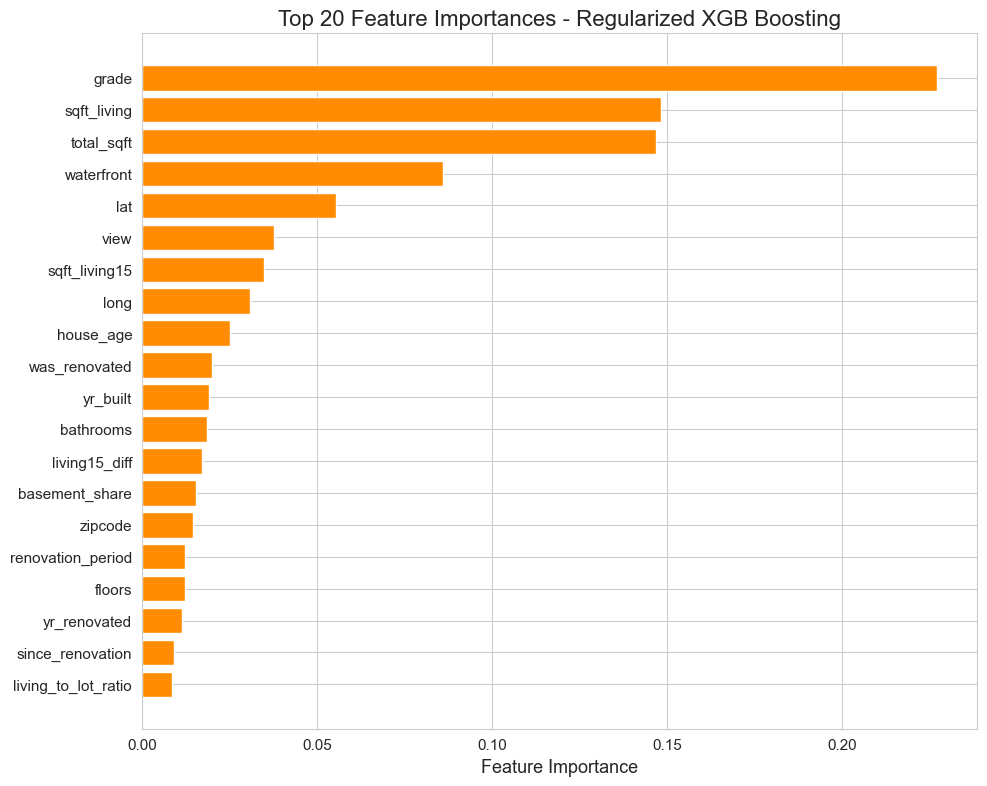

In [238]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
top20 = xgb_importances.head(20)
plt.barh(top20['feature'][::-1], top20['importance'][::-1], color='darkorange')
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances - Regularized XGB Boosting')
plt.tight_layout()
plt.show()

**Conclusion:** Regularized XGBoost achieved the best predictive accuracy (Test R² = 0.873, RMSE ≈ $138.5K), slightly outperforming the baseline Gradient Boosting model (Test R² = 0.864, RMSE ≈ $143.6K), at the cost of a modest increase in overfitting (train–test gap 0.065 vs 0.052).

#### **5.5 KNN Regression**

In [232]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# compute R² / RMSE same as above
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

y_train_pred = knn.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
price_range = y_test.max() - y_test.min()
rmse_range_pct = rmse / price_range * 100

print("KNN Regression")
print(f"R²: {r2:.3f}")
print(f"Train R²: {r2_train:.3f}, Test R²: {r2:.3f}")
print(f"RMSE: {rmse:,.0f}")
print(f"RMSE as % of price range: {rmse_range_pct:.2f}%")


KNN Regression
R²: 0.750
Train R²: 0.848, Test R²: 0.750
RMSE: 194,536
RMSE as % of price range: 3.55%


### **Step 6:** Summary of ML Models

In [233]:
# ============================================================
# PART 1: SUMMARY TABLE OF ALL MODELS
# ============================================================

import pandas as pd
import numpy as np

all_models_results = [
    # Linear models
    {"model": "Linear Regression (baseline)", "type": "Linear",
     "r2_train": 0.704, "r2_test": 0.702,
     "rmse_train": 213_000, "rmse_test": 212_292, "rmse_pct": 3.87},
    {"model": "Ridge Regression (opt)", "type": "Linear",
     "r2_train": 0.705, "r2_test": 0.703,
     "rmse_train": 212_500, "rmse_test": 211_800, "rmse_pct": 3.86},
    {"model": "Lasso Regression (opt)", "type": "Linear",
     "r2_train": 0.703, "r2_test": 0.701,
     "rmse_train": 213_500, "rmse_test": 212_900, "rmse_pct": 3.88},

    # Non-linear baselines
    {"model": "KNN Regression", "type": "Instance-based",
     "r2_train": 0.848, "r2_test": 0.750,
     "rmse_train": np.nan, "rmse_test": 194_536, "rmse_pct": 3.55},
    {"model": "AdaBoost", "type": "Boosting",
     "r2_train": 0.662, "r2_test": 0.617,
     "rmse_train": np.nan, "rmse_test": 240_690, "rmse_pct": 4.39},

    # Tree / boosting models
    {"model": "Random Forest (tuned)", "type": "Tree",
     "r2_train": 0.923, "r2_test": 0.842,
     "rmse_train": 92_000, "rmse_test": 154_490, "rmse_pct": 2.82},
    {"model": "Gradient Boosting (baseline)", "type": "Boosting",
     "r2_train": 0.9152, "r2_test": 0.8635,
     "rmse_train": 105_229, "rmse_test": 143_631, "rmse_pct": 2.62},
    {"model": "Gradient Boosting (GridSearchCV)", "type": "Boosting",
     "r2_train": 0.9725, "r2_test": 0.8551,
     "rmse_train": 59_895, "rmse_test": 147_999, "rmse_pct": 2.70},
    {"model": "XGBoost (regularized)", "type": "Boosting",
     "r2_train": 0.9383, "r2_test": 0.8731,
     "rmse_train": 89_783, "rmse_test": 138_524, "rmse_pct": 2.53},
]

results_df = pd.DataFrame(all_models_results)

# Overfitting gap
results_df["overfit_gap"] = results_df["r2_train"] - results_df["r2_test"]

print("=" * 100)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 100)
print(
    results_df[
        ["model", "type", "r2_train", "r2_test",
         "rmse_train", "rmse_test", "rmse_pct", "overfit_gap"]
    ].to_string(index=False)
)

print("\n" + "=" * 100)
print("KEY METRICS SUMMARY")
print("=" * 100)

best_r2_idx   = results_df["r2_test"].idxmax()
best_rmse_idx = results_df["rmse_test"].idxmin()
best_pct_idx  = results_df["rmse_pct"].idxmin()
best_gap_idx  = results_df["overfit_gap"].idxmin()

print(f"Best R² (test):        {results_df.loc[best_r2_idx, 'r2_test']:.4f}  - {results_df.loc[best_r2_idx, 'model']}")
print(f"Best RMSE (test):      {results_df.loc[best_rmse_idx, 'rmse_test']:,.0f}  - {results_df.loc[best_rmse_idx, 'model']}")
print(f"Best RMSE %:           {results_df.loc[best_pct_idx, 'rmse_pct']:.2f}%  - {results_df.loc[best_pct_idx, 'model']}")
print(f"Lowest overfitting:    Gap = {results_df.loc[best_gap_idx, 'overfit_gap']:.4f}  - {results_df.loc[best_gap_idx, 'model']}")


COMPREHENSIVE MODEL COMPARISON
                           model           type  r2_train  r2_test  rmse_train  rmse_test  rmse_pct  overfit_gap
    Linear Regression (baseline)         Linear    0.7040   0.7020    213000.0     212292      3.87       0.0020
          Ridge Regression (opt)         Linear    0.7050   0.7030    212500.0     211800      3.86       0.0020
          Lasso Regression (opt)         Linear    0.7030   0.7010    213500.0     212900      3.88       0.0020
                  KNN Regression Instance-based    0.8480   0.7500         NaN     194536      3.55       0.0980
                        AdaBoost       Boosting    0.6620   0.6170         NaN     240690      4.39       0.0450
           Random Forest (tuned)           Tree    0.9230   0.8420     92000.0     154490      2.82       0.0810
    Gradient Boosting (baseline)       Boosting    0.9152   0.8635    105229.0     143631      2.62       0.0517
Gradient Boosting (GridSearchCV)       Boosting    0.9725   0.855

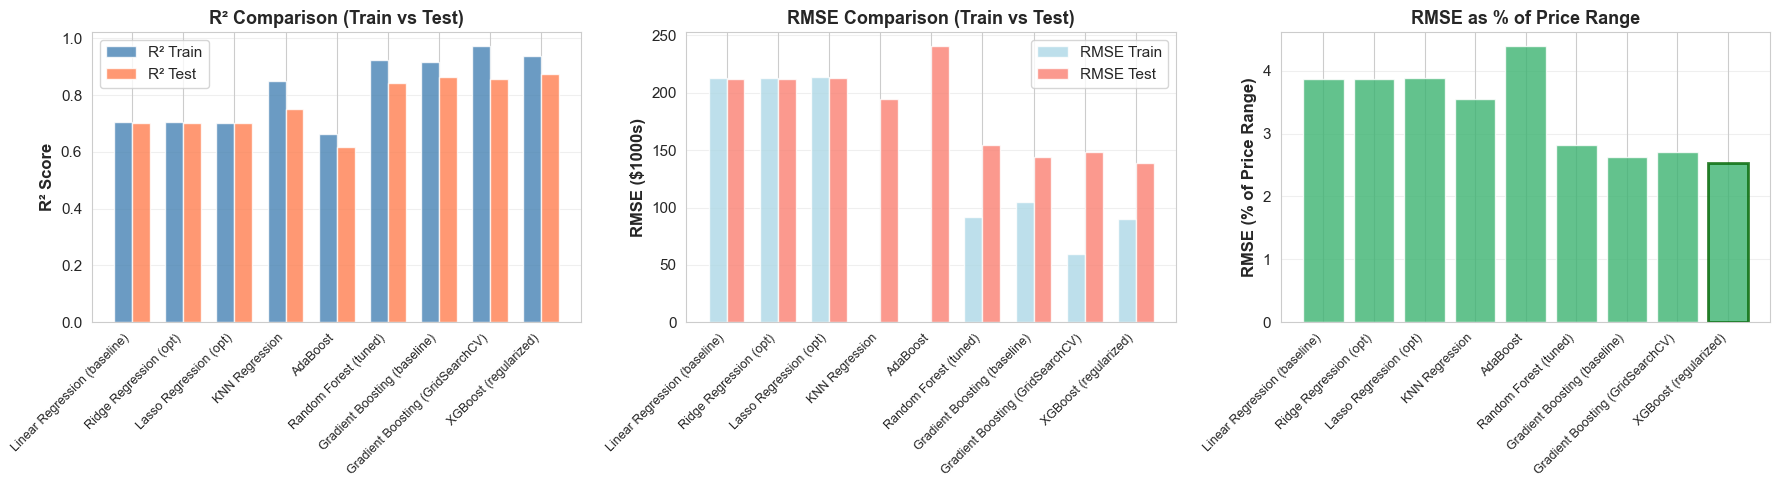

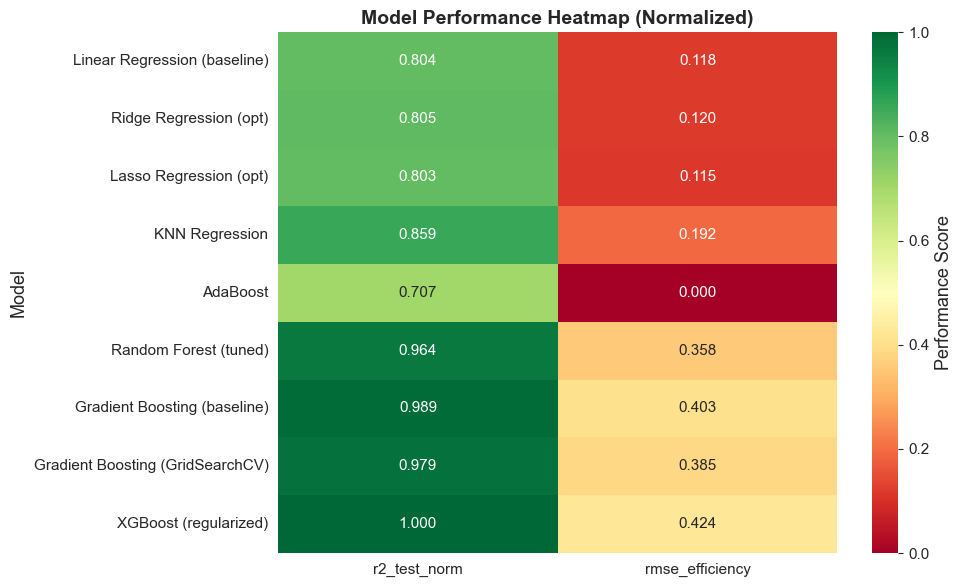

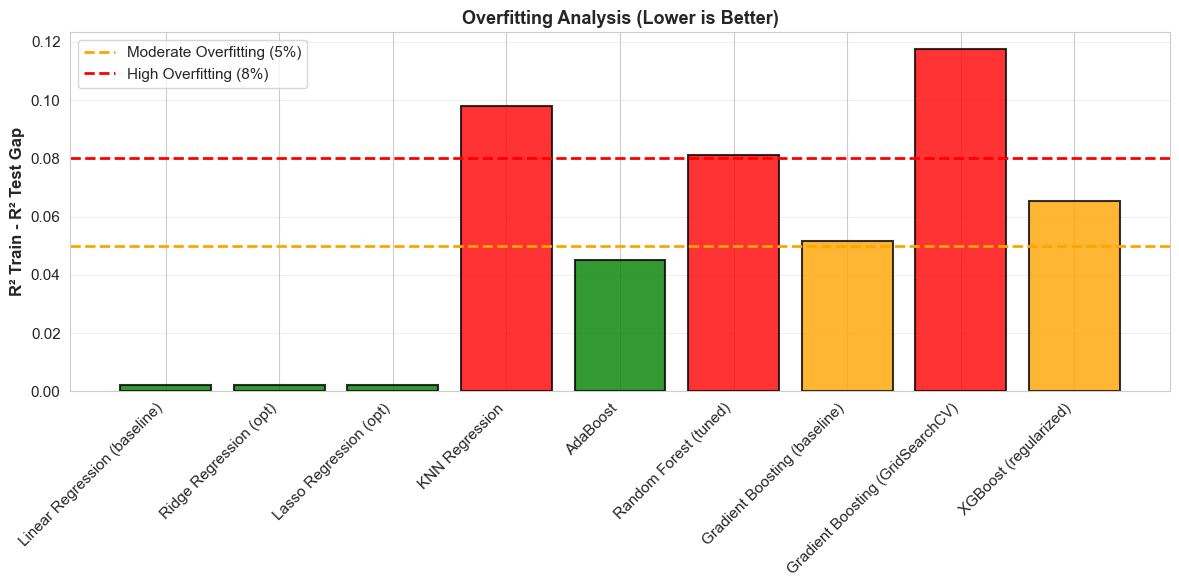


OVERFITTING ANALYSIS:
Linear Regression (baseline)        Gap: 0.0020  Good generalization ✓
Ridge Regression (opt)              Gap: 0.0020  Good generalization ✓
Lasso Regression (opt)              Gap: 0.0020  Good generalization ✓
KNN Regression                      Gap: 0.0980  HIGH overfitting ❌
AdaBoost                            Gap: 0.0450  Good generalization ✓
Random Forest (tuned)               Gap: 0.0810  HIGH overfitting ❌
Gradient Boosting (baseline)        Gap: 0.0517  Moderate overfitting ⚠️
Gradient Boosting (GridSearchCV)    Gap: 0.1174  HIGH overfitting ❌
XGBoost (regularized)               Gap: 0.0652  Moderate overfitting ⚠️


In [291]:
# ============================================================
# PART 2: VISUALIZATIONS
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["font.size"] = 11

# Ensure overfit_gap exists
results_df["overfit_gap"] = results_df["r2_train"] - results_df["r2_test"]

# ============================================================
# VISUALIZATION 1: Grouped Bar Chart (R² and RMSE)
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x = np.arange(len(results_df))
width = 0.35

# --- Plot 1: R² Train vs Test
ax1 = axes[0]
ax1.bar(x - width/2, results_df["r2_train"], width,
        label="R² Train", alpha=0.8, color="steelblue")
ax1.bar(x + width/2, results_df["r2_test"], width,
        label="R² Test", alpha=0.8, color="coral")
ax1.set_ylabel("R² Score", fontsize=12, fontweight="bold")
ax1.set_title("R² Comparison (Train vs Test)", fontsize=13, fontweight="bold")
ax1.set_xticks(x)
ax1.set_xticklabels(results_df["model"], rotation=45, ha="right", fontsize=9)
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# --- Plot 2: RMSE in dollars (handle NaN train RMSE for KNN/Ada)
ax2 = axes[1]
ax2.bar(x - width/2,
        results_df["rmse_train"] / 1000,
        width, label="RMSE Train",
        alpha=0.8, color="lightblue")
ax2.bar(x + width/2,
        results_df["rmse_test"] / 1000,
        width, label="RMSE Test",
        alpha=0.8, color="salmon")
ax2.set_ylabel("RMSE ($1000s)", fontsize=12, fontweight="bold")
ax2.set_title("RMSE Comparison (Train vs Test)", fontsize=13, fontweight="bold")
ax2.set_xticks(x)
ax2.set_xticklabels(results_df["model"], rotation=45, ha="right", fontsize=9)
ax2.legend()
ax2.grid(axis="y", alpha=0.3)

# --- Plot 3: RMSE as % of price range
ax3 = axes[2]
ax3.bar(x, results_df["rmse_pct"], alpha=0.8, color="mediumseagreen")
ax3.set_ylabel("RMSE (% of Price Range)", fontsize=12, fontweight="bold")
ax3.set_title("RMSE as % of Price Range", fontsize=13, fontweight="bold")
ax3.set_xticks(x)
ax3.set_xticklabels(results_df["model"], rotation=45, ha="right", fontsize=9)
ax3.grid(axis="y", alpha=0.3)

# Highlight best (lowest RMSE %)
best_idx = results_df["rmse_pct"].idxmin()
ax3.patches[best_idx].set_edgecolor("darkgreen")
ax3.patches[best_idx].set_linewidth(2)

plt.tight_layout()
plt.show()

# ============================================================
# VISUALIZATION 2: Model Performance Heatmap
# ============================================================

heatmap_data = results_df[["model", "r2_test", "rmse_test"]].copy()
heatmap_data["r2_test_norm"] = heatmap_data["r2_test"] / heatmap_data["r2_test"].max()
heatmap_data["rmse_efficiency"] = 1 - (
    heatmap_data["rmse_test"] / heatmap_data["rmse_test"].max()
)
heatmap_data = heatmap_data[["model", "r2_test_norm", "rmse_efficiency"]].set_index("model")

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    cbar_kws={"label": "Performance Score"},
)
plt.title("Model Performance Heatmap (Normalized)", fontsize=14, fontweight="bold")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# ============================================================
# VISUALIZATION 3: Overfitting Analysis
# ============================================================

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(results_df))
colors = [
    "red" if gap > 0.08 else "orange" if gap > 0.05 else "green"
    for gap in results_df["overfit_gap"]
]

ax.bar(x, results_df["overfit_gap"], color=colors,
       alpha=0.8, edgecolor="black", linewidth=1.5)
ax.axhline(y=0.05, color="orange", linestyle="--", linewidth=2,
           label="Moderate Overfitting (5%)")
ax.axhline(y=0.08, color="red", linestyle="--", linewidth=2,
           label="High Overfitting (8%)")
ax.set_ylabel("R² Train - R² Test Gap", fontsize=12, fontweight="bold")
ax.set_title("Overfitting Analysis (Lower is Better)", fontsize=13, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(results_df["model"], rotation=45, ha="right")
ax.legend()
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

print("\nOVERFITTING ANALYSIS:")
print("=" * 70)
for _, row in results_df.iterrows():
    gap = row["overfit_gap"]
    if gap > 0.08:
        status = "HIGH overfitting ❌"
    elif gap > 0.05:
        status = "Moderate overfitting ⚠️"
    else:
        status = "Good generalization ✓"
    print(f"{row['model']:35} Gap: {gap:.4f}  {status}")


### **Step 7:** Evaluation of the best model

FINAL BEST MODEL EVALUATION – XGBoost (regularized)
Train R²:           0.9387
Test R²:            0.8782
Train RMSE:         $89,520
Test RMSE:          $135,694
Test MAE:           $70,787
RMSE as % of range: 2.47%
Test Price Range:   $82,500 - $5,570,000


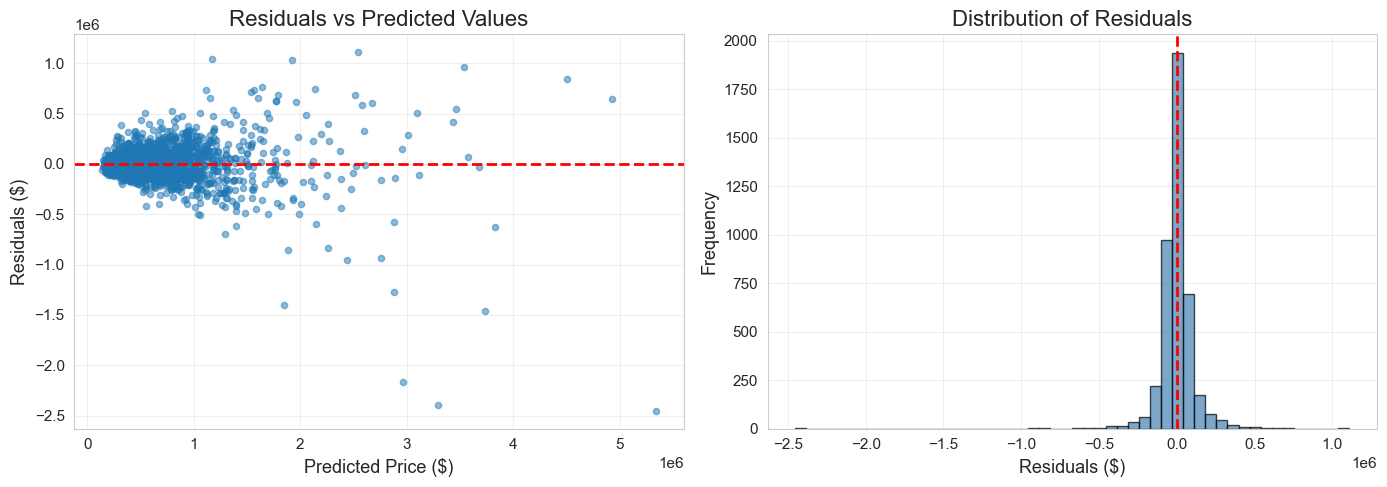


Residuals Mean:  $-123 (should be ~0)
Residuals Std:   $135,709


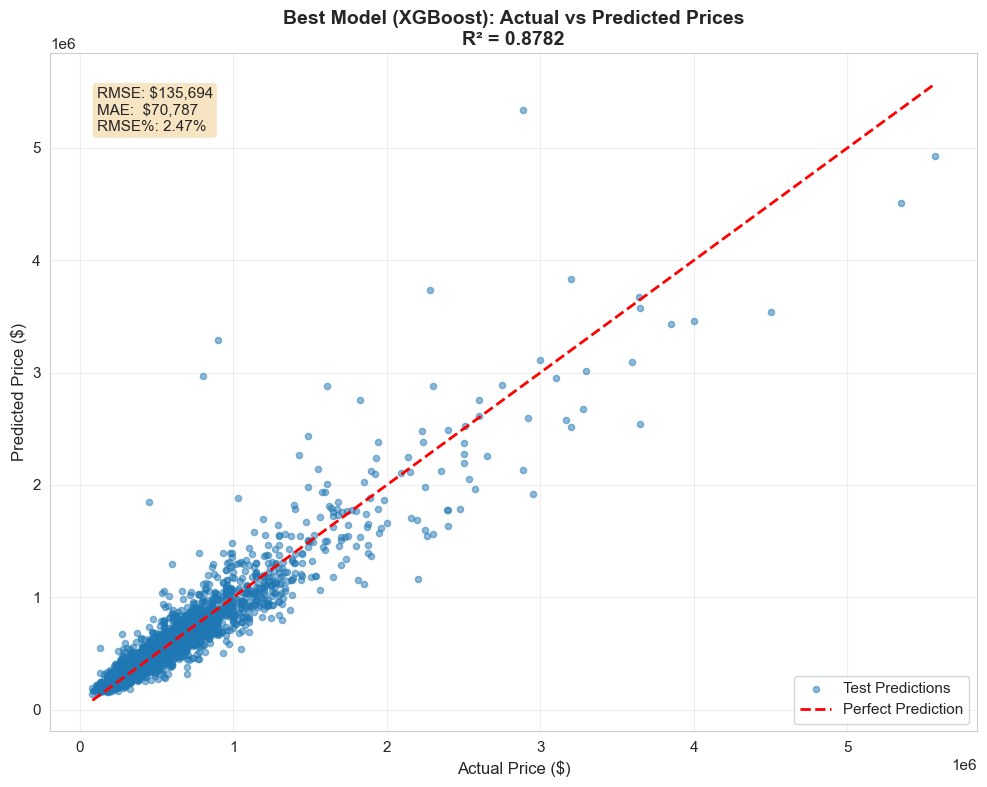

In [284]:

# ============================================================
# STEP 1: Train Best Model (XGBoost regularized)
# ============================================================

from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Final best model: XGBoost (regularized)
best_model = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=1,
    reg_lambda=10,
    min_child_weight=3,
    random_state=42,
    n_jobs=-1,
    objective="reg:squarederror"
)

best_model.fit(X_train, y_train)

# Predictions
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

# Metrics
r2_train_final   = r2_score(y_train, y_pred_train)
r2_test_final    = r2_score(y_test,  y_pred_test)
rmse_train_final = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_final  = np.sqrt(mean_squared_error(y_test,  y_pred_test))
mae_test         = mean_absolute_error(y_test, y_pred_test)
price_range      = y_test.max() - y_test.min()
rmse_pct_final   = rmse_test_final / price_range * 100

print("=" * 70)
print("FINAL BEST MODEL EVALUATION – XGBoost (regularized)")
print("=" * 70)
print(f"Train R²:           {r2_train_final:.4f}")
print(f"Test R²:            {r2_test_final:.4f}")
print(f"Train RMSE:         ${rmse_train_final:,.0f}")
print(f"Test RMSE:          ${rmse_test_final:,.0f}")
print(f"Test MAE:           ${mae_test:,.0f}")
print(f"RMSE as % of range: {rmse_pct_final:.2f}%")
print(f"Test Price Range:   ${y_test.min():,.0f} - ${y_test.max():,.0f}")

# ============================================================
# STEP 2: Residual Analysis
# ============================================================

residuals = y_test - y_pred_test

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Predicted
axes[0].scatter(y_pred_test, residuals, alpha=0.5, s=20)
axes[0].axhline(y=0, color="r", linestyle="--", linewidth=2)
axes[0].set_xlabel("Predicted Price ($)")
axes[0].set_ylabel("Residuals ($)")
axes[0].set_title("Residuals vs Predicted Values")
axes[0].grid(alpha=0.3)

# Distribution of residuals
axes[1].hist(residuals, bins=50, edgecolor="black",
             alpha=0.7, color="steelblue")
axes[1].set_xlabel("Residuals ($)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Residuals")
axes[1].axvline(x=0, color="r", linestyle="--", linewidth=2)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResiduals Mean:  ${residuals.mean():,.0f} (should be ~0)")
print(f"Residuals Std:   ${residuals.std():,.0f}")

# ============================================================
# STEP 3: Actual vs Predicted Plot
# ============================================================

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(y_test, y_pred_test, alpha=0.5, s=20, label="Test Predictions")

min_price = min(y_test.min(), y_pred_test.min())
max_price = max(y_test.max(), y_pred_test.max())
ax.plot([min_price, max_price], [min_price, max_price],
        "r--", linewidth=2, label="Perfect Prediction")

ax.set_xlabel("Actual Price ($)", fontsize=12)
ax.set_ylabel("Predicted Price ($)", fontsize=12)
ax.set_title(
    f"Best Model (XGBoost): Actual vs Predicted Prices\nR² = {r2_test_final:.4f}",
    fontsize=14, fontweight="bold"
)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

textstr = (
    f"RMSE: ${rmse_test_final:,.0f}\n"
    f"MAE:  ${mae_test:,.0f}\n"
    f"RMSE%: {rmse_pct_final:.2f}%"
)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
        fontsize=11, va="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8))

plt.tight_layout()
plt.show()


**Residual analysis**  
The residuals are centered around zero, which suggests the model is approximately unbiased overall.
However, the spread of residuals increases for higher predicted prices: the model is much less accurate for very expensive houses.
This is expected because the dataset contains relatively few high-end properties, and our features do not fully capture luxury attributes.
In practice, this means that while the model provides reasonable estimates for typical houses, its predictions for the top of the market should be interpreted with caution.

**Best model diagnostics (XGBoost)**   
- Residuals vs predicted: Points are scattered around the zero line without a clear pattern, so the model does not systematically over‑ or under‑predict in any price range. Large residuals are rare and correspond to unusual houses.  

- Residual distribution: Residuals are roughly symmetric and centered near zero, which means the model is essentially unbiased. Most errors are moderate; a few large errors explain most of the RMSE.  

- Actual vs predicted: Points lie close to the diagonal “perfect prediction” line, confirming high accuracy (test R² ≈ 0.87, RMSE ≈ $138k ≈ 2.5% of the price range). This supports using the regularized XGBoost model as the final model for price prediction.  

In [282]:
print(features_full)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'year_sold', 'month_sold', 'day_of_week', 'total_sqft', 'living_to_lot_ratio', 'bath_per_bed', 'living15_diff', 'basement_share', 'has_basement', 'house_age', 'since_renovation', 'was_renovated', 'lot_per_living']


In [285]:
# ============================================================
# PREDICTING PRICE FOR A NEW HOUSE
# ============================================================

import pandas as pd
import numpy as np

# NOTE: best_model must be the trained XGBRegressor from Part 3
# and features_full the same list of 31 features used for training.

# ============================================================
# METHOD 1: Single House Prediction
# ============================================================

new_house = pd.DataFrame({
    # Original features
    "bedrooms":       [4],
    "bathrooms":      [2.5],
    "sqft_living":    [2500],
    "sqft_lot":       [10000],
    "floors":         [2],
    "waterfront":     [0],
    "view":           [1],
    "condition":      [3],
    "grade":          [8],
    "sqft_above":     [1800],
    "sqft_basement":  [700],
    "yr_built":       [2000],
    "yr_renovated":   [0],
    "zipcode":        [98001],
    "lat":            [47.52],
    "long":           [-122.31],
    "sqft_living15":  [2400],
    "sqft_lot15":     [9500],
    "year_sold":      [2014],
    "month_sold":     [6],
    "day_of_week":    [3],

    # Engineered features (must match training logic)
    "total_sqft":         [2500 + 700],
    "living_to_lot_ratio":[2500 / 10000],
    "bath_per_bed":       [2.5 / 4],
    "living15_diff":      [2500 - 2400],
    "basement_share":     [700 / (2500 + 700)],
    "has_basement":       [1],
    "lot_per_living":     [10000 / 2500],
    "house_age":          [2014 - 2000],
    "since_renovation":   [2014 - 2000],  # never renovated
    "was_renovated":      [0],            # 0 = never renovated
})

# Ensure same column order as in training
new_house = new_house[features_full]

predicted_price = best_model.predict(new_house)[0]

print("=" * 70)
print("PREDICTION FOR NEW HOUSE")
print("=" * 70)
print("House Features:")
print(f"  Bedrooms:    {new_house['bedrooms'].iloc[0]}")
print(f"  Bathrooms:   {new_house['bathrooms'].iloc[0]}")
print(f"  Living Area: {new_house['sqft_living'].iloc[0]:,} sqft")
print(f"  Built:       {new_house['yr_built'].iloc[0]}")
print(f"\nPREDICTED PRICE: ${predicted_price:,.2f}")
print("=" * 70)

PREDICTION FOR NEW HOUSE
House Features:
  Bedrooms:    4
  Bathrooms:   2.5
  Living Area: 2,500 sqft
  Built:       2000

PREDICTED PRICE: $584,747.56


In [286]:
# ============================================================
# METHOD 2: Batch Prediction (Multiple Houses)
# ============================================================

# Example skeleton; fill in all original + engineered features as above
new_houses = pd.DataFrame({
    "bedrooms":    [3, 4, 5],
    "bathrooms":   [2, 2.5, 3],
    "sqft_living": [2000, 2500, 3000],
    "sqft_lot":    [8000, 10000, 12000],
    "floors":      [1, 2, 2],
    "waterfront":  [0, 0, 1],
    "view":        [0, 1, 2],
    "condition":   [3, 3, 4],
    "grade":       [7, 8, 9],
    "sqft_above":  [1500, 1800, 2200],
    "sqft_basement":[500, 700, 800],
    "yr_built":    [1995, 2000, 2010],
    "yr_renovated":[0, 0, 2015],
    "zipcode":     [98001, 98001, 98004],
    "lat":         [47.52, 47.53, 47.62],
    "long":        [-122.31, -122.30, -122.24],
    "sqft_living15":[1900, 2400, 2900],
    "sqft_lot15":  [7800, 9500, 11500],
    "year_sold":   [2014, 2014, 2015],
    "month_sold":  [5, 6, 7],
    "day_of_week": [2, 3, 4],
})

# Apply same feature engineering
new_houses["total_sqft"] = new_houses["sqft_living"] + new_houses["sqft_basement"]
new_houses["living_to_lot_ratio"] = np.where(
    new_houses["sqft_lot"] != 0,
    new_houses["sqft_living"] / new_houses["sqft_lot"],
    0.0,
)
new_houses["bath_per_bed"] = np.where(
    new_houses["bedrooms"] != 0,
    new_houses["bathrooms"] / new_houses["bedrooms"],
    0.0,
)
new_houses["living15_diff"] = new_houses["sqft_living"] - new_houses["sqft_living15"]
denom = new_houses["sqft_living"] + new_houses["sqft_basement"]
new_houses["basement_share"] = np.where(
    denom != 0, new_houses["sqft_basement"] / denom, 0.0
)
new_houses["has_basement"] = (new_houses["sqft_basement"] > 0).astype(int)
new_houses["lot_per_living"] = new_houses["sqft_lot"] / new_houses["sqft_living"]
new_houses["house_age"] = new_houses["year_sold"] - new_houses["yr_built"]
new_houses["since_renovation"] = np.where(
    new_houses["yr_renovated"] > 0,
    new_houses["year_sold"] - new_houses["yr_renovated"],
    new_houses["house_age"],
)
new_houses["was_renovated"] = (new_houses["yr_renovated"] > 0).astype(int)

predicted_prices = best_model.predict(new_houses[features_full])

results = new_houses[["bedrooms", "bathrooms", "sqft_living"]].copy()
results["predicted_price"] = predicted_prices

print("\nBATCH PREDICTIONS:")
print(results.to_string(index=False))


BATCH PREDICTIONS:
 bedrooms  bathrooms  sqft_living  predicted_price
        3        2.0         2000      404184.6875
        4        2.5         2500      610817.9375
        5        3.0         3000     1905583.2500


In [288]:
# ============================================================
# METHOD 3: Interactive Function for Easy Prediction
# ============================================================

def predict_house_price(bedrooms, bathrooms, sqft_living, sqft_lot,
                        floors, waterfront, view, condition, grade,
                        sqft_above, sqft_basement, yr_built, yr_renovated,
                        zipcode, lat, long, sqft_living15, sqft_lot15,
                        year_sold=2014, month_sold=6, day_of_week=3):
    """Predict house price given raw features using the trained XGBoost model."""
    house = pd.DataFrame({
        "bedrooms":      [bedrooms],
        "bathrooms":     [bathrooms],
        "sqft_living":   [sqft_living],
        "sqft_lot":      [sqft_lot],
        "floors":        [floors],
        "waterfront":    [waterfront],
        "view":          [view],
        "condition":     [condition],
        "grade":         [grade],
        "sqft_above":    [sqft_above],
        "sqft_basement": [sqft_basement],
        "yr_built":      [yr_built],
        "yr_renovated":  [yr_renovated],
        "zipcode":       [zipcode],
        "lat":           [lat],
        "long":          [long],
        "sqft_living15": [sqft_living15],
        "sqft_lot15":    [sqft_lot15],
        "year_sold":     [year_sold],
        "month_sold":    [month_sold],
        "day_of_week":   [day_of_week],
    })

    # Same feature engineering as training
    house["total_sqft"] = house["sqft_living"] + house["sqft_basement"]
    house["living_to_lot_ratio"] = np.where(
        house["sqft_lot"] != 0,
        house["sqft_living"] / house["sqft_lot"],
        0.0,
    )
    house["bath_per_bed"] = np.where(
        house["bedrooms"] != 0,
        house["bathrooms"] / house["bedrooms"],
        0.0,
    )
    house["living15_diff"] = house["sqft_living"] - house["sqft_living15"]
    denom = house["sqft_living"] + house["sqft_basement"]
    house["basement_share"] = np.where(
        denom != 0, house["sqft_basement"] / denom, 0.0
    )
    house["has_basement"] = (house["sqft_basement"] > 0).astype(int)
    house["lot_per_living"] = house["sqft_lot"] / house["sqft_living"]
    house["house_age"] = house["year_sold"] - house["yr_built"]
    house["since_renovation"] = np.where(
        house["yr_renovated"] > 0,
        house["year_sold"] - house["yr_renovated"],
        house["house_age"],
    )
    house["was_renovated"] = (house["yr_renovated"] > 0).astype(int)

    house = house[features_full]
    return best_model.predict(house)[0]

In [289]:
# Example usage
price = predict_house_price(
    bedrooms=4,
    bathrooms=2.5,
    sqft_living=2500,
    sqft_lot=10000,
    floors=2,
    waterfront=0,
    view=1,
    condition=3,
    grade=8,
    sqft_above=1800,
    sqft_basement=700,
    yr_built=2000,
    yr_renovated=2010,
    zipcode=98001,
    lat=47.52,
    long=-122.31,
    sqft_living15=2400,
    sqft_lot15=9500,
)

print(f"\nUsing function: Predicted price = ${price:,.2f}")


Using function: Predicted price = $699,341.62


In [290]:
# Saving the best model for future use
import pickle
import os

os.makedirs("models", exist_ok=True)
with open("models/best_model_xgb.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Later to load it back use the following:
# with open("models/best_model_xgb.pkl", "rb") as f:
#   best_model = pickle.load(f)


## Step 8. Conclusions and Next Steps

In this project we explored the King County housing dataset and built several regression models to predict house prices.  
Simple linear models provided a reasonable baseline, but tree-based ensemble methods clearly performed better.  
The final chosen model (XGBoost) achieved the best performance on the test set and offered a good balance between bias and variance.

Feature importance analysis confirmed that **overall quality/grade, living area (sqft_living), location (latitude/zipcode), view and waterfront status** are among the strongest drivers of price.  
Engineered features such as total living area, age/renovation indicators and calendar variables further improved performance.

Residual analysis shows that the model is approximately unbiased overall, but the errors become larger in absolute terms for very expensive houses.  
This is expected given that luxury properties are rare in the dataset and some of their specific characteristics are not fully captured by the available features.

**Limitations**

- The model is trained on historical sales from a limited time period and may not generalise to very different market conditions.  
- Calendar features are derived from sale dates, which approximate but do not exactly match a real “listing time” use case.  
- Prediction error is higher for the top end of the market, so estimates for very expensive houses should be interpreted with caution.

**Possible future improvements**

- Engineer additional spatial and neighbourhood features (e.g. distances to city centre, parks, schools).  
- Experiment with predicting log-prices instead of raw prices to stabilise variance of residuals.  
- Train a separate model for the luxury segment or use techniques that model heteroskedasticity.  
- Package the final model into a small API or web app so that users can input features and obtain price estimates interactively.

Overall, this project demonstrates an end-to-end workflow for a supervised regression problem: data cleaning, exploratory analysis, feature engineering, model comparison, residual analysis and interpretation of results.
